# DOMAIN: Telecom

# CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

# DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

# Customers who left within the last month – the column is called Churn

# Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

# Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

# Demographic info about customers – gender, age range, and if they have partners and dependents

# PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [156]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# 1. Data Understanding & Exploration:

# A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

    * We are reading the file TelcomCustomer-Churn_1.csv as a dataframe and assigning it to TCC1 Variable

In [157]:
TCC1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [158]:
TCC1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [159]:
TCC1.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes


In [160]:
print(TCC1.describe())
print('\n\n',TCC1.columns)
print('\n\n',TCC1.dtypes)

       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000


 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')


 customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
dtype: object


    * TCC1 data set contains of 7043 rows and 10 columns

# B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

    * We are reading the file TelcomCustomer-Churn_2.csv as a dataframe and assigning it to TCC2 Variable

In [161]:
TCC2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [162]:
TCC2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
TCC2.tail()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [164]:
print(TCC2.describe())
print('\n\n',TCC2.columns)
print('\n\n',TCC2.dtypes)

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000


 Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


 customerID           object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


    * TCC2 data set contains of 7043 rows and 12 columns

# C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [165]:
TCCHURN = TCC1.merge(TCC2,left_on='customerID',right_on='customerID')

In [166]:
print(TCCHURN.describe())
print('\n\n',TCCHURN.columns)
print('\n\n',TCCHURN.dtypes)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                i

    * We have merged the TCC1 dataset with TCC2 dataset on column customerID to form TCCHURN as our final dataset.

In [167]:
TCCHURN.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
TCCHURN.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [169]:
A = TCC1.columns.values
B = TCC2.columns.values
C = np.concatenate((A,B))
C = set(C)
C = list(C)# All the columns in TCC1 and TCC2 dataset are placed in C array
D = np.array(TCCHURN.columns.values) # All the columns of TCCHURN dataset are placed in D Array
C = sorted(C)
D = sorted(D)

In [170]:
if np.array_equal(C, D) == True :
    print('\n\nAll the columns in TCC1 and TCC2 DataFrames are incorporated in the merged DataFrame TCCHURN')
else :
    print('\n\All the columns in TCC1 and TCC2 DataFrames are not incorporated in the merged DataFrame TCCHURN')



All the columns in TCC1 and TCC2 DataFrames are incorporated in the merged DataFrame TCCHURN


    * From the above comparison, we can say that all the columns in TCC1 and TCC2 datasets are incorporated 
    in the merged dataset TCCHURN.

# 2. Data Cleaning & Analysis:

# B. Make sure all the variables with continuous values are of ‘Float’ type.

In [171]:
TCCHURN.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [172]:
#TotalCharges consists the numerical data, but represented as Object datatype.
#Let's change the datatype of TotalCharges into Numeric data type and proceed further.
TCCHURN.TotalCharges = pd.to_numeric(TCCHURN.TotalCharges, errors='coerce')
TCCHURN.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# A. Impute missing/unexpected values in the DataFrame.

In [173]:
if TCCHURN.isnull().sum().values.sum() == 0:
    print('THERE ARE NO MISSING VALUES IN THE DATASET')
else:
    print('THERE ARE',TCCHURN.isnull().sum().values.sum(),'MISSING VALUES IN THE DATASET\n')

THERE ARE 11 MISSING VALUES IN THE DATASET



In [174]:
for COL in TCCHURN.columns:
    if TCCHURN.loc[TCCHURN[COL].isnull()==True].shape[0] > 0:
        print('BELOW ARE THE ', TCCHURN.loc[TCCHURN[COL].isnull()==True].shape[0],'MISSING VALUES IN THE DATA\n\n')
        print(TCCHURN.loc[TCCHURN[COL].isnull()==True])

BELOW ARE THE  11 MISSING VALUES IN THE DATA


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone ser

    * From the above output, we can say that there 11 missing values in the TotalCharges column.
   

   * Out of 7043 records, we are having only 11 rows of data with missing values in TotalCharges but we have
    values in monthlycharges and tenure value is 0, which contradicts the churn. So we can drop these 11 rows to 
    proceed with further data exploration.

In [175]:
TCCHURN.dropna(inplace = True)
TCCHURN.reset_index(drop=True, inplace=True)

* CustomerID column can be dropped as we do not need to explain churn for each customer.

In [176]:
TCCHURN.drop(columns = 'customerID', inplace = True)

In [177]:
TCCHURN['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

* We can see there are paranthesis in the PaymentMethod column which may cause some issues in visualization or analysing the data. We can remove these data subset.

In [178]:
TCCHURN['PaymentMethod'] = TCCHURN['PaymentMethod'].str.replace('(automatic)','',regex = False)

In [179]:
TCCHURN['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

In [180]:
TCCHURN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [181]:
TCCOPY = TCCHURN.copy(deep = True)

In [182]:
import warnings
warnings.filterwarnings("ignore")
TCCOPY['TenureGroup'] = ""
for i in np.arange(0, TCCOPY['tenure'].value_counts().sum(),1):
    if (TCCOPY['tenure'][i] > 0) and (TCCOPY['tenure'][i] <= 12):
        TCCOPY['TenureGroup'][i] = '1-12'
    elif (TCCOPY['tenure'][i] > 12) and (TCCOPY['tenure'][i] <= 24):
        TCCOPY['TenureGroup'][i] = '13-24'
    elif (TCCOPY['tenure'][i] > 24) and (TCCOPY['tenure'][i] <= 36):
        TCCOPY['TenureGroup'][i] = '25-36'
    elif (TCCOPY['tenure'][i] > 36) and (TCCOPY['tenure'][i] <= 48):
        TCCOPY['TenureGroup'][i] = '37-48'
    elif (TCCOPY['tenure'][i] > 48) and (TCCOPY['tenure'][i] <= 60):
        TCCOPY['TenureGroup'][i] = '48-60'
    else :
        TCCOPY['TenureGroup'][i] = '61-72'
        
# In above code, we are dividing the tenure into 6 groups considering 1-12 months, 13-24 months and so on

In [185]:
CC = TCCOPY.drop(['TotalCharges', 'MonthlyCharges','tenure'], axis = 1).columns

# C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

    * We are defining a function pieplots(COLS)in which we are taking various categorical colums as input and 
    plotting them using pie plots. We are using respective legends and percentage information to ensure the 
    readability of the charts to the users.

In [186]:
def pieplots(COLS):
    fig, ax = plt.subplots(6, 3)
    fig.set_figheight(30)
    fig.set_figwidth(30)
    x=0
    y=0
    for j in COLS:
        mylabels = TCCOPY[j].unique()
        ax[x][y].pie(TCCOPY[j].value_counts(),autopct='%1.1f%%')
        ax[x][y].set_title(j)
        ax[x][y].legend(labels = mylabels, loc="best")
        y = y+1
        if y == 3:
            x = x+1
            y = 0
    fig.tight_layout()
    plt.show()

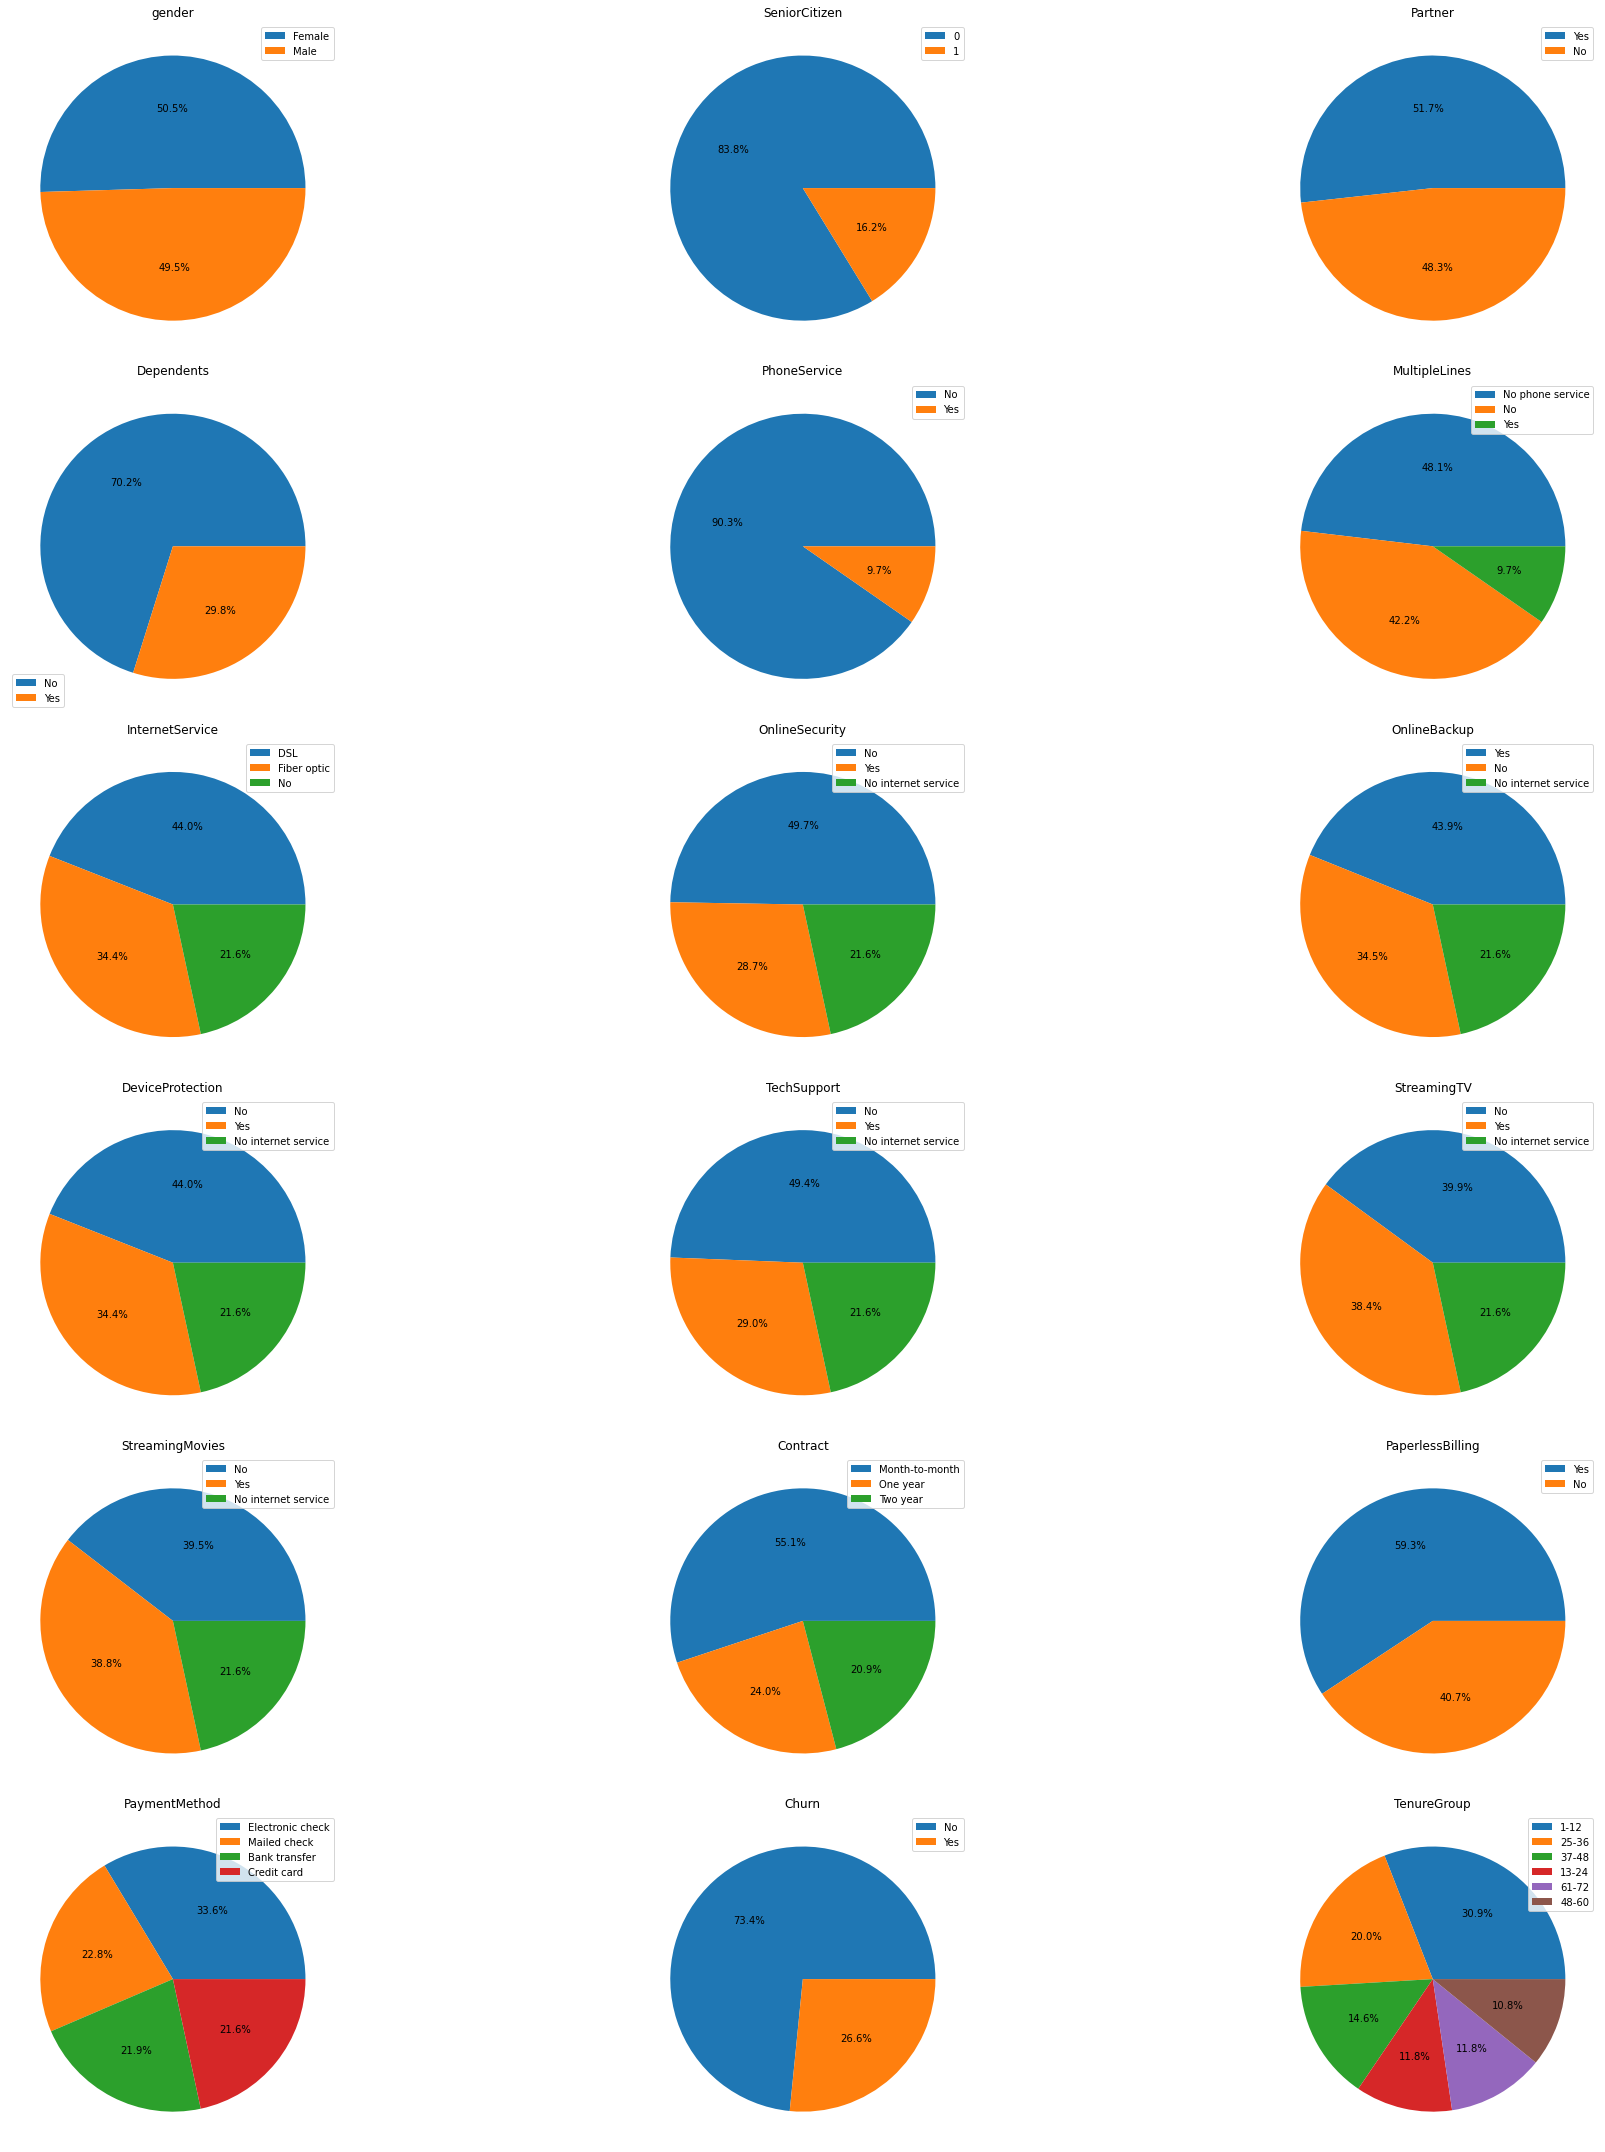

In [187]:
COLS = TCCOPY.drop(['TotalCharges', 'MonthlyCharges','tenure'], axis = 1).columns
pieplots(COLS)

# D. Share insights for Q2.c.

    * We have divided the Tenure column into three groups i.e. 1-24, 25-48, 49-72 to plot the tenure data easily
    * More than 40% of the users are under 1-12 and 13-24 tenure combined
    * There are more of the users where there is no churn.
    * Most of the customers have paid their bills through Electronic Check.
    * Male to Female customers are almost equal in usage.
    * More than 83% of the customers are not senior citizens.
    * More than 90% of the customers are not using phone service and same amount of customers are not having
    multiple lines
    * 21.6% of customers are not having internet service as well as online security.
    * Internet service, Online Security, Online Protection and Device protection are having same plots and can be
    seen as interconnected to each other.
    * 59.3% of the customers opted for paperless billing.
    * Streaming TV and Streaming movies are having similar plots.

# E. Encode all the appropriate Categorical features with the best suitable approach.

In [188]:
#LEF - Features selected for label encoding
LEF = ['Partner','Dependents','PhoneService','PaperlessBilling']

for i in LEF:
    TCCHURN[i] = TCCHURN[i].map({'Yes':1, 'No':0})

TCCHURN['gender'] = TCCHURN['gender'].map({'Female':1, 'Male':0})

In [189]:
TCCHURN['Churn'] = TCCHURN['Churn'].map({'Yes':1, 'No':0})

In [190]:
#OHEF - Features selected for Onehot encoding

OHEF = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

TCCHURN = pd.get_dummies(TCCHURN, columns = OHEF)

In [191]:
TCCHURN.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


# F. Split the data into 80% train and 20% test.

In [192]:
X = TCCHURN.drop('Churn', axis = 1)
Y = TCCHURN['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=24)

# G. Normalize/Standardize the data with the best suitable approach.

In [193]:
# We are going to use Normalize method scale the data

# fit scaler on training data
normalize = MinMaxScaler().fit(X_train)

# transform training data
X_train_n = normalize.transform(X_train)

# transform testing dataabs
X_test_n = normalize.transform(X_test)

# 3. Model building and Improvement:

# A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [194]:
from xgboost import XGBClassifier
eval_set = [(X_train_n, Y_train), (X_test_n, Y_test)]
eval_metric = ["auc","error"]
XGB_MODEL = XGBClassifier()
XGB_MODEL.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)
PRED_XGB_MODEL = XGB_MODEL.predict(X_test_n)
ACC_XGB_MODEL = accuracy_score(Y_test, PRED_XGB_MODEL)
print('ACCURACY SCORE USING XGBOOST: ',ACC_XGB_MODEL)

ACCURACY SCORE USING XGBOOST:  0.7931769722814499


<AxesSubplot:>

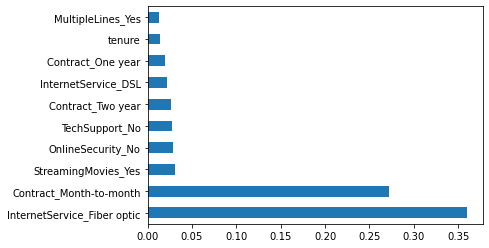

In [195]:
feat_importances = pd.Series(XGB_MODEL.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [196]:
print(classification_report(Y_test,PRED_XGB_MODEL )) 
print(accuracy_score(Y_test, PRED_XGB_MODEL ))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1029
           1       0.63      0.55      0.59       378

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

0.7931769722814499


In [197]:
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix

acc = cross_val_score(XGB_MODEL, X_train_n, Y_train, cv=5, scoring='accuracy', n_jobs=10)
prec = cross_val_score(XGB_MODEL, X_train_n, Y_train, cv=5, scoring='precision', n_jobs=10)
rec = cross_val_score(XGB_MODEL, X_train_n, Y_train, cv=5, scoring='recall', n_jobs=10)
f1 = cross_val_score(XGB_MODEL, X_train_n, Y_train, cv=5, scoring='f1', n_jobs=10)
auc = cross_val_score(XGB_MODEL, X_train_n, Y_train, cv=5, scoring='roc_auc', n_jobs=10)

XGB_VALUES = pd.DataFrame(list(zip(acc,prec,rec,auc,f1)),
                          columns = ['ACCURACY','PRECISION','RECALL','AUC-ROC','F1-SCORE'])

print('VARIOUS RESULTS USING XGB BOOSTING ON TRAINING DATA:\n\n',XGB_VALUES)
print('\n\n')

print('XGB BOOSTING','\n--------------------------------')
print('ACCURACY:', np.mean(acc))
print('PRECISION:', np.mean(prec))
print('RECALL:', np.mean(rec))
print('AUC-ROC:', np.mean(auc))
print('F1:', np.mean(f1))
print('--------------------------------\n')

VARIOUS RESULTS USING XGB BOOSTING ON TRAINING DATA:

    ACCURACY  PRECISION    RECALL   AUC-ROC  F1-SCORE
0  0.779556   0.603239  0.498328  0.808245  0.545788
1  0.785778   0.618257  0.500000  0.825915  0.552876
2  0.792000   0.635593  0.503356  0.833452  0.561798
3  0.796444   0.633205  0.550336  0.822959  0.588869
4  0.767111   0.568182  0.503356  0.811559  0.533808



XGB BOOSTING 
--------------------------------
ACCURACY: 0.7841777777777776
PRECISION: 0.6116951599065968
RECALL: 0.5110749478126192
AUC-ROC: 0.8204261758286577
F1: 0.5566275528529815
--------------------------------



In [198]:
acc = cross_val_score(XGB_MODEL, X_test_n, Y_test, cv=5, scoring='accuracy', n_jobs=-1)
prec = cross_val_score(XGB_MODEL, X_test_n, Y_test, cv=5, scoring='precision', n_jobs=-1)
rec = cross_val_score(XGB_MODEL, X_test_n, Y_test, cv=5, scoring='recall', n_jobs=-1)
f1 = cross_val_score(XGB_MODEL, X_test_n, Y_test, cv=5, scoring='f1', n_jobs=-1)
auc = cross_val_score(XGB_MODEL, X_test_n, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)

XGB_VALUES = pd.DataFrame(list(zip(acc,prec,rec,auc,f1)),
                          columns = ['ACCURACY','PRECISION','RECALL','AUC-ROC','F1-SCORE'])

print('VARIOUS RESULTS USING XGB BOOSTING ON TESTING DATA:\n\n',XGB_VALUES)
print('\n\n')

print('XGB BOOSTING','\n--------------------------------')
print('ACCURACY:', np.mean(acc))
print('PRECISION:', np.mean(prec))
print('RECALL:', np.mean(rec))
print('AUC-ROC:', np.mean(auc))
print('F1:', np.mean(f1))
print('--------------------------------\n')

VARIOUS RESULTS USING XGB BOOSTING ON TESTING DATA:

    ACCURACY  PRECISION    RECALL   AUC-ROC  F1-SCORE
0  0.744681   0.527027  0.513158  0.781521  0.520000
1  0.804965   0.661538  0.565789  0.848876  0.609929
2  0.761566   0.567164  0.500000  0.774262  0.531469
3  0.790036   0.614286  0.573333  0.811392  0.593103
4  0.765125   0.581818  0.426667  0.775663  0.492308



XGB BOOSTING 
--------------------------------
ACCURACY: 0.7732742737437218
PRECISION: 0.5903667127547724
RECALL: 0.5157894736842106
AUC-ROC: 0.7983428364304083
F1: 0.549361750013254
--------------------------------



0.7931769722814499


<AxesSubplot:>

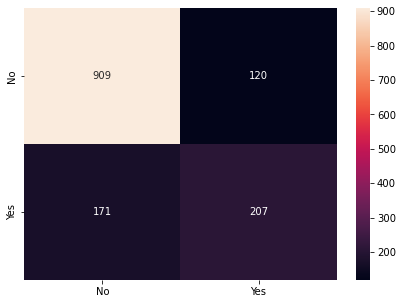

In [199]:
Y_PRED = XGB_MODEL.predict(X_test_n)

print(XGB_MODEL.score(X_test_n, Y_test))

CM = metrics.confusion_matrix(Y_test, Y_PRED,labels=[0, 1])

CM_DF = pd.DataFrame(CM, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(CM_DF, annot=True ,fmt='g')

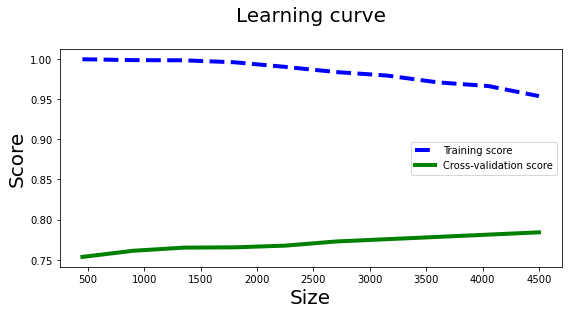

In [200]:
    TRAIN_SIZE, TRAIN_SCORE, TEST_SCORE = learning_curve(XGB_MODEL,X_train_n,Y_train,
        train_sizes = np.arange(0.1, 1.1 , 0.1), cv = 5, n_jobs=-1, scoring='accuracy',random_state=10) 
    
    TRAINING_MEAN = np.mean(TRAIN_SCORE, axis=1)
    TESTING_MEAN = np.mean(TEST_SCORE, axis=1)

    plt.figure(figsize=(9,4))
    plt.plot(TRAIN_SIZE, TRAINING_MEAN, '--', color="b",  label="Training score", linewidth=4)
    plt.plot(TRAIN_SIZE, TESTING_MEAN ,color="g", label="Cross-validation score", linewidth=4)

    plt.title('Learning curve\n', fontsize=20)
    plt.xlabel("Size", fontsize=20),
    plt.ylabel("Score", fontsize=20),
    plt.legend(loc="best")
    plt.show()

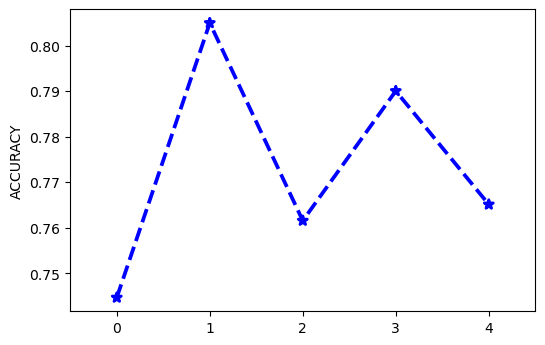

In [201]:
plt.figure(figsize=(6,4), dpi=100)
sns.pointplot(y=XGB_VALUES['ACCURACY'] , x=XGB_VALUES.index ,markers='*',linestyles='--', color='b');

In [202]:
# Define the parameters for XGB Classifier

XGB_PARAMS = {'learning_rate': np.arange(0.3, 0.8, 0.1),
            'n_estimators': np.arange(300, 501, 50),
            'max_depth': np.arange(2, 10, 1),
            'gamma': np.arange(0.3, 1.1, 0.1),
            'min_child_weight': np.arange(3, 7, 1),
            'reg_alpha': np.arange(0.3, 0.8, 0.1),
            'reg_lambda': np.arange(0.3, 0.8, 0.1),
            'subsample': np.arange(0.5, 1.1, 0.1),
            'colsample_bytree': np.arange(0.5, 1.1, 0.1)}

In [203]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

RANS_XGB = RandomizedSearchCV(XGB_MODEL, XGB_PARAMS, scoring='accuracy', verbose = 1)

RANS_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1...
                                        'gamma': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': ar

In [204]:
HYPER_PARAM_XGB = pd.DataFrame(RANS_XGB.cv_results_)\
.sort_values('mean_test_score')\
.reset_index(drop=True)\
.sort_values('mean_test_score', ascending=False)

HYPER_PARAM_XGB

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,...,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,3.317070,0.435267,0.014912,0.001386,0.9,0.3,0.5,500,5,3,...,1.0,"{'subsample': 0.8999999999999999, 'reg_lambda'...",0.765333,0.782222,0.784889,0.793778,0.755556,0.776356,0.013892,1
4,2.662994,0.491587,0.015777,0.005578,0.7,0.4,0.5,300,6,4,...,1.0,"{'subsample': 0.7, 'reg_lambda': 0.4, 'reg_alp...",0.768889,0.782222,0.777778,0.780444,0.758222,0.773511,0.008914,2
3,4.001635,0.603882,0.023148,0.009479,0.8,0.3,0.7,400,6,6,...,0.6,"{'subsample': 0.7999999999999999, 'reg_lambda'...",0.775111,0.763556,0.770667,0.772444,0.762667,0.768889,0.004933,3
2,2.488865,0.198069,0.012091,0.004240,0.6,0.4,0.7,450,6,3,...,1.0,"{'subsample': 0.6, 'reg_lambda': 0.4, 'reg_alp...",0.759111,0.767111,0.773333,0.766222,0.753778,0.763911,0.006784,4
1,2.720720,0.685714,0.010291,0.005853,0.9,0.3,0.5,400,3,4,...,0.6,"{'subsample': 0.8999999999999999, 'reg_lambda'...",0.760000,0.749333,0.776889,0.773333,0.749333,0.761778,0.011617,5
0,3.183532,0.550371,0.024985,0.007674,0.5,0.7,0.4,300,5,9,...,0.5,"{'subsample': 0.5, 'reg_lambda': 0.70000000000...",0.762667,0.742222,0.750222,0.765333,0.741333,0.752356,0.010035,6
6,0.031078,0.014536,0.000000,0.000000,1.1,0.3,0.7,450,3,4,...,0.7,"{'subsample': 1.0999999999999999, 'reg_lambda'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.035181,0.005243,0.000000,0.000000,0.9,0.6,0.4,350,6,8,...,1.1,"{'subsample': 0.8999999999999999, 'reg_lambda'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.033967,0.007352,0.000000,0.000000,1.1,0.3,0.3,450,6,3,...,0.9,"{'subsample': 1.0999999999999999, 'reg_lambda'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.035554,0.004391,0.000000,0.000000,0.7,0.7,0.7,300,4,2,...,1.1,"{'subsample': 0.7, 'reg_lambda': 0.70000000000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [205]:
#Print the best hyper parameters after tuning

BEST_PARAMS_XGB = RANS_XGB.best_estimator_

BEST_PARAMS_XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9999999999999999,
              enable_categorical=False, gamma=0.9000000000000001, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.5, reg_lambda=0.3, scale_pos_weight=1,
              subsample=0.8999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [206]:
ACCURACY = cross_val_score(BEST_PARAMS_XGB, X_train_n, Y_train, cv=5, scoring='accuracy', n_jobs=10)
PRECISION = cross_val_score(BEST_PARAMS_XGB, X_train_n, Y_train, cv=5, scoring='precision', n_jobs=10)
RECALL = cross_val_score(BEST_PARAMS_XGB, X_train_n, Y_train, cv=5, scoring='recall', n_jobs=10)
F1_SCORE = cross_val_score(BEST_PARAMS_XGB, X_train_n, Y_train, cv=5, scoring='f1', n_jobs=10)
ROC_AUC = cross_val_score(BEST_PARAMS_XGB, X_train_n, Y_train, cv=5, scoring='roc_auc', n_jobs=10)

XGB_VALUES_TRAIN = pd.DataFrame(list(zip(ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC)),
                          columns = ['ACCURACY','PRECISION','RECALL','F1-SCORE','ROC_AUC'])

print('USING RANDOMSEARCHCV TO BOOST XGB MODEL ON TRAINING DATA:\n\n',XGB_VALUES_TRAIN)
    
print('\n\nTRAINING DATA METRICS AFTER IMPROVING XGB MODEL ON TRAINING DATA')
print('--------------------------------------------------------------\n')
print('ACCURACY:', np.mean(ACCURACY))
print('PRECISION:', np.mean(PRECISION))
print('RECALL:', np.mean(RECALL))
print('AUC-ROC:', np.mean(ROC_AUC))
print('F1:', np.mean(F1_SCORE))
print('--------------------------------\n')

USING RANDOMSEARCHCV TO BOOST XGB MODEL ON TRAINING DATA:

    ACCURACY  PRECISION    RECALL  F1-SCORE   ROC_AUC
0  0.765333   0.566038  0.501672  0.531915  0.793306
1  0.782222   0.603922  0.516779  0.556962  0.823487
2  0.784889   0.614754  0.503356  0.553506  0.832633
3  0.793778   0.625000  0.553691  0.587189  0.822744
4  0.755556   0.543726  0.479866  0.509804  0.800875


TRAINING DATA METRICS AFTER IMPROVING XGB MODEL ON TRAINING DATA
--------------------------------------------------------------

ACCURACY: 0.7763555555555556
PRECISION: 0.5906879277157217
RECALL: 0.5110727031940921
AUC-ROC: 0.8146089888559989
F1: 0.5478749975314198
--------------------------------



In [207]:
ACCURACY = cross_val_score(BEST_PARAMS_XGB, X_test_n, Y_test, cv=5, scoring='accuracy', n_jobs=10)
PRECISION = cross_val_score(BEST_PARAMS_XGB, X_test_n, Y_test, cv=5, scoring='precision', n_jobs=10)
RECALL = cross_val_score(BEST_PARAMS_XGB, X_test_n, Y_test, cv=5, scoring='recall', n_jobs=10)
F1_SCORE = cross_val_score(BEST_PARAMS_XGB, X_test_n, Y_test, cv=5, scoring='f1', n_jobs=10)
ROC_AUC = cross_val_score(BEST_PARAMS_XGB, X_test_n, Y_test, cv=5, scoring='roc_auc', n_jobs=10)


XGB_VALUES_TEST = pd.DataFrame(list(zip(ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC)),
                          columns = ['ACCURACY','PRECISION','RECALL','F1-SCORE','ROC_AUC'])

print('USING RANDOMSEARCHCV TO BOOST XGB MODEL ON TEST DATA:\n\n',XGB_VALUES_TEST)


print('\n\nTESTING DATA METRICS AFTER IMPROVING XGB MODEL ON TESTING DATA')
print('--------------------------------------------------------------\n')
print('ACCURACY:', np.mean(ACCURACY))
print('PRECISION:', np.mean(PRECISION))
print('RECALL:', np.mean(RECALL))
print('AUC-ROC:', np.mean(ROC_AUC))
print('F1:', np.mean(F1_SCORE))
print('--------------------------------\n')

USING RANDOMSEARCHCV TO BOOST XGB MODEL ON TEST DATA:

    ACCURACY  PRECISION    RECALL  F1-SCORE   ROC_AUC
0  0.765957   0.571429  0.526316  0.547945  0.766000
1  0.808511   0.648649  0.631579  0.640000  0.830161
2  0.775801   0.597015  0.526316  0.559441  0.762323
3  0.790036   0.617647  0.560000  0.587413  0.815243
4  0.779359   0.618182  0.453333  0.523077  0.785178


TESTING DATA METRICS AFTER IMPROVING XGB MODEL ON TESTING DATA
--------------------------------------------------------------

ACCURACY: 0.7839327629287498
PRECISION: 0.6105842044911404
RECALL: 0.5395087719298245
AUC-ROC: 0.7917810839554487
F1: 0.5715750550819043
--------------------------------



    * We have improved the XGB model using RandomSearchCV method and used the best performance parameters.
    
    * We can see max accuracy value of training data is more than 79.5%
    
    * For testing data, at accuracy of 80.8%, ROC_AUC is also increased to 83%

# B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [208]:
# Let us use the GridSearchCV method with a set of parameters as described for RandomSearchCV

# Define the parameters for XGB Classifier

# Since GridSearchCV takes too long time to perform, we are dividing the parameters and check the performance
# individually.

# Perform GridSearchCV using learning rate:
XGB_PARAMS_GCV = {'learning_rate': np.arange(0.1, 1.1, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\n\nBEST LEARNING RATE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\n\nBEST LEARNING RATE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

TRAINING DATA METRICS:

BEST LEARNING RATE PARAMETER VALUE: {'learning_rate': 0.1}

BEST SCORE: 0.8
Fitting 5 folds for each of 10 candidates, totalling 50 fits


TESTING DATA METRICS:

BEST LEARNING RATE PARAMETER VALUE: {'learning_rate': 0.1}

BEST SCORE: 0.8


In [209]:
# Perform GridSearchCV using n_estimators:

XGB_PARAMS_GCV = {'n_estimators': np.arange(300, 500, 50)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST N_ESTIMATOR PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST N_ESTIMATOR PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

TRAINING DATA METRICS:
BEST N_ESTIMATOR PARAMETER VALUE: {'n_estimators': 300}

BEST SCORE: 0.77
Fitting 5 folds for each of 4 candidates, totalling 20 fits


TESTING DATA METRICS:
BEST N_ESTIMATOR PARAMETER VALUE: {'n_estimators': 300}

BEST SCORE: 0.77


In [210]:
# Perform GridSearchCV using max_depth:

XGB_PARAMS_GCV = {'max_depth': np.arange(4, 7, 1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINIG DATA METRICS:\nBEST MAX_DEPTH PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST MAX_DEPTH PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

TRAINIG DATA METRICS:
BEST MAX_DEPTH PARAMETER VALUE: {'max_depth': 4}

BEST SCORE: 0.79
Fitting 5 folds for each of 3 candidates, totalling 15 fits


TESTING DATA METRICS:
BEST MAX_DEPTH PARAMETER VALUE: {'max_depth': 4}

BEST SCORE: 0.78


In [211]:
# Perform GridSearchCV using gamma:

XGB_PARAMS_GCV = {'gamma': np.arange(0.7, 1, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST GAMMA PARAMETER VALUE:',GRID_XGB.best_params_,2)

print('\n\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\nTESTING DATA METRICS:\nBEST GAMMA PARAMETER VALUE:',GRID_XGB.best_params_,2)

print('\n\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

TRAINING DATA METRICS:
BEST GAMMA PARAMETER VALUE: {'gamma': 0.8999999999999999} 2


BEST SCORE: 0.79
Fitting 5 folds for each of 4 candidates, totalling 20 fits

TESTING DATA METRICS:
BEST GAMMA PARAMETER VALUE: {'gamma': 0.7999999999999999} 2


BEST SCORE: 0.8


In [212]:
# Perform GridSearchCV using min_child_weight:

XGB_PARAMS_GCV = {'min_child_weight': np.arange(3, 7, 1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST MIN_CHILD_WEIGHT PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST MIN_CHILD_WEIGHT PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

TRAINING DATA METRICS:
BEST MIN_CHILD_WEIGHT PARAMETER VALUE: {'min_child_weight': 6}

BEST SCORE: 0.79
Fitting 5 folds for each of 4 candidates, totalling 20 fits


TESTING DATA METRICS:
BEST MIN_CHILD_WEIGHT PARAMETER VALUE: {'min_child_weight': 4}

BEST SCORE: 0.78


In [213]:
# Perform GridSearchCV using reg_alpha:

XGB_PARAMS_GCV = {'reg_alpha': np.arange(0.5, 0.8, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST REG_ALPHA PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST REG_ALPHA PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

TRAINING DATA METRICS:
BEST REG_ALPHA PARAMETER VALUE: {'reg_alpha': 0.6}

BEST SCORE: 0.78
Fitting 5 folds for each of 4 candidates, totalling 20 fits


TESTING DATA METRICS:
BEST REG_ALPHA PARAMETER VALUE: {'reg_alpha': 0.6}

BEST SCORE: 0.78


In [214]:
# Perform GridSearchCV using reg_lambda:

XGB_PARAMS_GCV = {'reg_lambda': np.arange(0.3, 0.6, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST REG_LAMBDA PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST REG_LAMBDA PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

TRAINING DATA METRICS:
BEST REG_LAMBDA PARAMETER VALUE: {'reg_lambda': 0.4}

BEST SCORE: 0.78
Fitting 5 folds for each of 3 candidates, totalling 15 fits


TESTING DATA METRICS:
BEST REG_LAMBDA PARAMETER VALUE: {'reg_lambda': 0.4}

BEST SCORE: 0.79


In [215]:
# Perform GridSearchCV using subsample:

XGB_PARAMS_GCV = {'subsample': np.arange(0.9, 1.1, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST SUBSAMPLE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST SUBSAMPLE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

TRAINING DATA METRICS:
BEST SUBSAMPLE PARAMETER VALUE: {'subsample': 1.0}

BEST SCORE: 0.78
Fitting 5 folds for each of 3 candidates, totalling 15 fits


TESTING DATA METRICS:
BEST SUBSAMPLE PARAMETER VALUE: {'subsample': 0.9}

BEST SCORE: 0.77


In [216]:
# Perform GridSearchCV using colsample_bytree:

XGB_PARAMS_GCV = {'colsample_bytree': np.arange(0.7, 1.0, 0.1)}

GRID_XGB = GridSearchCV(estimator = XGB_MODEL, param_grid = XGB_PARAMS_GCV,
                              scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\nTRAINING DATA METRICS:\nBEST COLSAMPLE_BYTREE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nTESTING DATA METRICS:\nBEST COLSAMPLE_BYTREE PARAMETER VALUE:',GRID_XGB.best_params_)

print('\nBEST SCORE:',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

TRAINING DATA METRICS:
BEST COLSAMPLE_BYTREE PARAMETER VALUE: {'colsample_bytree': 0.8999999999999999}

BEST SCORE: 0.78
Fitting 5 folds for each of 4 candidates, totalling 20 fits


TESTING DATA METRICS:
BEST COLSAMPLE_BYTREE PARAMETER VALUE: {'colsample_bytree': 0.7}

BEST SCORE: 0.78


    * We have run the GridSearchCV for the individual hyperparameter and derived best parameter value 
    and best score using that parameter.
    
    * Based on the above tests, below list is the set of the best performing parameters:
    
    {'learning_rate': 0.1,
            'n_estimators': 300,
            'max_depth': 4,
            'gamma': np.arange(0.7, 1, 0.1),
            'min_child_weight': np.arange(4, 7, 2),
            'reg_alpha': 0.6,
            'reg_lambda': 0.4,
            'subsample': np.arange(0.9, 1.1, 0.1),
            'colsample_bytree': np.arange(0.7, 1, 0.2)}
            
    * Let us create a prameter grid using the above best values and see the performance of the training and testing
    data using grid search CV

In [217]:
XGB_PARAMS_GCV = {'gamma': np.arange(0.7, 1.0, 0.1),
            'min_child_weight': np.arange(4, 7, 2),
            'subsample': np.arange(0.9, 1.1, 0.1),
            'colsample_bytree': np.arange(0.7, 1.0, 0.2),
                 'learning_rate' : np.arange(0.1,0.3,0.1)}

In [218]:
XGB_TUNED=XGBClassifier(base_score=0.5, booster='gbtree', 
                        n_estimators= 300, max_depth= 4, reg_alpha= 0.6, reg_lambda= 0.4)

GRID_XGB = GridSearchCV(estimator=XGB_TUNED, 
                        param_grid = XGB_PARAMS_GCV,
                        scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_train_n,Y_train,eval_metric=eval_metric,verbose=True)

print('\n\nBEST PARAMETERS ON TRAINING DATA:',GRID_XGB.best_params_)

print('\nTRAINING DATA SCORE USING BEST PARAMETERS :',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


BEST PARAMETERS ON TRAINING DATA: {'colsample_bytree': 0.8999999999999999, 'gamma': 0.7999999999999999, 'learning_rate': 0.1, 'min_child_weight': 6, 'subsample': 1.0}

TRAINING DATA SCORE USING BEST PARAMETERS : 0.8


In [219]:
XGB_TUNED=XGBClassifier(base_score=0.5, booster='gbtree', learning_rate= 0.2, 
                        n_estimators= 300, max_depth= 4, reg_alpha= 0.6, reg_lambda= 0.4)

GRID_XGB = GridSearchCV(estimator=XGB_TUNED, 
                        param_grid = XGB_PARAMS_GCV,
                        scoring='accuracy', n_jobs=10, cv=5, verbose = 1)

GRID_XGB.fit(X_test_n,Y_test,eval_metric=eval_metric,verbose=True)

print('\n\nBEST PARAMETERS ON TESTING DATA:',GRID_XGB.best_params_)

print('\nTESTING DATA SCORE USING BEST PARAMETERS :',round(GRID_XGB.best_score_,2))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


BEST PARAMETERS ON TESTING DATA: {'colsample_bytree': 0.8999999999999999, 'gamma': 0.8999999999999999, 'learning_rate': 0.2, 'min_child_weight': 4, 'subsample': 1.0}

TESTING DATA SCORE USING BEST PARAMETERS : 0.8


    * We have used the best hyper parameters on the trainig and testing data and could see the 
    model score of training data at 80% and testing data at 80%.

TESTING DATA SCORE:  0.8699360341151386


<AxesSubplot:>

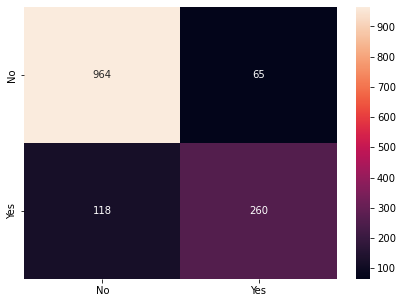

In [220]:
#Print test data predictability and heatmap

Y_PRED_GCV = GRID_XGB.predict(X_test_n)

print('TESTING DATA SCORE: ',GRID_XGB.score(X_test_n, Y_test))

CM = metrics.confusion_matrix(Y_test, Y_PRED_GCV,labels=[0, 1])

CM_DF = pd.DataFrame(CM, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(CM_DF, annot=True ,fmt='g')

In [221]:
# Print classification matrix:

print(classification_report(Y_test,Y_PRED_GCV)) 
print(accuracy_score(Y_test, Y_PRED_GCV))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1029
           1       0.80      0.69      0.74       378

    accuracy                           0.87      1407
   macro avg       0.85      0.81      0.83      1407
weighted avg       0.87      0.87      0.87      1407

0.8699360341151386


In [222]:
XGB_FIN = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate= 0.2, n_estimators= 300, 
                        max_depth= 4, reg_alpha= 0.6, reg_lambda= 0.4, gamma= 0.9, 
                        min_child_weight= 4, subsample= 1, 
                        colsample_bytree= 0.9)

In [223]:
ACCURACY = cross_val_score(XGB_FIN, X_train_n, Y_train, cv=5, scoring='accuracy', n_jobs=10)
PRECISION = cross_val_score(XGB_FIN, X_train_n, Y_train, cv=5, scoring='precision', n_jobs=10)
RECALL = cross_val_score(XGB_FIN, X_train_n, Y_train, cv=5, scoring='recall', n_jobs=10)
F1_SCORE = cross_val_score(XGB_FIN, X_train_n, Y_train, cv=5, scoring='f1', n_jobs=10)
ROC_AUC = cross_val_score(XGB_FIN, X_train_n, Y_train, cv=5, scoring='roc_auc', n_jobs=10)


XGB_VALUES_TRAIN = pd.DataFrame(list(zip(ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC)),
                          columns = ['ACCURACY','PRECISION','RECALL','F1-SCORE','ROC_AUC'])

print('USING GRIDSEARCHCV TO BOOST XGB MODEL ON TRAINING DATA:\n\n',XGB_VALUES_TRAIN)
    
print('\n\nTRAINING DATA METRICS AFTER IMPROVING XGB MODEL ON TRAINING DATA')
print('--------------------------------------------------------------\n')
print('ACCURACY:', np.mean(ACCURACY))
print('PRECISION:', np.mean(PRECISION))
print('RECALL:', np.mean(RECALL))
print('AUC-ROC:', np.mean(ROC_AUC))
print('F1:', np.mean(F1_SCORE))
print('--------------------------------\n')

print('BEST ACCURACY ON TRAINING DATA:',max(ACCURACY))

USING GRIDSEARCHCV TO BOOST XGB MODEL ON TRAINING DATA:

    ACCURACY  PRECISION    RECALL  F1-SCORE   ROC_AUC
0  0.791111   0.632231  0.511706  0.565619  0.819659
1  0.799111   0.646341  0.533557  0.584559  0.843609
2  0.797333   0.650862  0.506711  0.569811  0.847173
3  0.806222   0.670940  0.526846  0.590226  0.841572
4  0.771556   0.579151  0.503356  0.538600  0.818459


TRAINING DATA METRICS AFTER IMPROVING XGB MODEL ON TRAINING DATA
--------------------------------------------------------------

ACCURACY: 0.7930666666666667
PRECISION: 0.6359051374859158
RECALL: 0.5164350968552894
AUC-ROC: 0.8340944628571567
F1: 0.569762914557473
--------------------------------

BEST ACCURACY ON TRAINING DATA: 0.8062222222222222


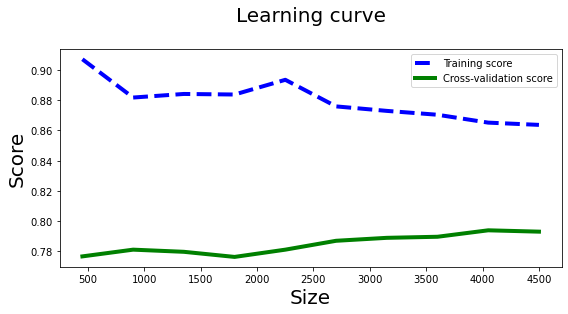

In [224]:
    TRAIN_SIZE, TRAIN_SCORE, TEST_SCORE = learning_curve(XGB_FIN,X_train_n,Y_train,
        train_sizes = np.arange(0.1, 1.1 , 0.1), cv = 5, n_jobs=10, scoring='accuracy',random_state=10) 
    
    TRAINING_MEAN = np.mean(TRAIN_SCORE, axis=1)
    TESTING_MEAN = np.mean(TEST_SCORE, axis=1)

    plt.figure(figsize=(9,4))
    plt.plot(TRAIN_SIZE, TRAINING_MEAN, '--', color="b",  label="Training score", linewidth=4)
    plt.plot(TRAIN_SIZE, TESTING_MEAN ,color="g", label="Cross-validation score", linewidth=4)

    plt.title('Learning curve\n', fontsize=20)
    plt.xlabel("Size", fontsize=20),
    plt.ylabel("Score", fontsize=20),
    plt.legend(loc="best")
    plt.show()

In [225]:
ACCURACY = cross_val_score(XGB_FIN, X_test_n, Y_test, cv=5, scoring='accuracy', n_jobs=10)
PRECISION = cross_val_score(XGB_FIN, X_test_n, Y_test, cv=5, scoring='precision', n_jobs=10)
RECALL = cross_val_score(XGB_FIN, X_test_n, Y_test, cv=5, scoring='recall', n_jobs=10)
F1_SCORE = cross_val_score(XGB_FIN, X_test_n, Y_test, cv=5, scoring='f1', n_jobs=10)
ROC_AUC = cross_val_score(XGB_FIN, X_test_n, Y_test, cv=5, scoring='roc_auc', n_jobs=10)


XGB_VALUES_TRAIN = pd.DataFrame(list(zip(ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC)),
                          columns = ['ACCURACY','PRECISION','RECALL','F1-SCORE','ROC_AUC'])

print('USING GRIDSEARCHCV TO BOOST XGB MODEL ON TESTING DATA:\n\n',XGB_VALUES_TRAIN)
    
print('\n\nTESING DATA METRICS AFTER IMPROVING XGB MODEL USING GRIDSEARCH:')
print('--------------------------------------------------------------\n')
print('ACCURACY:', np.mean(ACCURACY))
print('PRECISION:', np.mean(PRECISION))
print('RECALL:', np.mean(RECALL))
print('AUC-ROC:', np.mean(ROC_AUC))
print('F1:', np.mean(F1_SCORE))
print('--------------------------------\n')

print('BEST ACCURACY ON TESTING DATA:',max(ACCURACY))

USING GRIDSEARCHCV TO BOOST XGB MODEL ON TESTING DATA:

    ACCURACY  PRECISION    RECALL  F1-SCORE   ROC_AUC
0  0.773050   0.588235  0.526316  0.555556  0.797937
1  0.815603   0.657895  0.657895  0.657895  0.861714
2  0.807829   0.696429  0.513158  0.590909  0.802888
3  0.807829   0.666667  0.560000  0.608696  0.837638
4  0.807829   0.698113  0.493333  0.578125  0.828414


TESING DATA METRICS AFTER IMPROVING XGB MODEL USING GRIDSEARCH:
--------------------------------------------------------------

ACCURACY: 0.8024280053506978
PRECISION: 0.6614676953204321
RECALL: 0.5501403508771929
AUC-ROC: 0.8257182700416681
F1: 0.5982360070961329
--------------------------------

BEST ACCURACY ON TESTING DATA: 0.8156028368794326


In [226]:
# Using the best prameters from GRID SEARCH CV and train the model to see the improvement in accuracy.

eval_s = [(X_train_n, Y_train), (X_test_n, Y_test)]

XGB_FIN.fit(X_train_n,Y_train,eval_metric='logloss',verbose=False,eval_set=eval_s)

Y_FIN_PRED = XGB_FIN.predict(X_test_n)

score = accuracy_score(Y_test,Y_FIN_PRED)

print('ACCURACY_SCORE:',score)

ACCURACY_SCORE: 0.8073916133617626


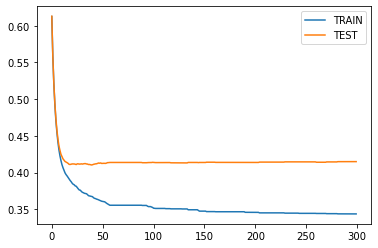

In [227]:
RESULTS = XGB_FIN.evals_result()

plt.plot(RESULTS['validation_0']['logloss'], label='TRAIN')

plt.plot(RESULTS['validation_1']['logloss'], label='TEST')

plt.legend()

plt.show()

<AxesSubplot:>

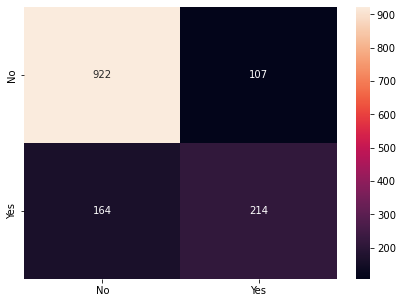

In [228]:
#plot heatmap

Y_PRED_FIN = XGB_FIN.predict(X_test_n)

CM = metrics.confusion_matrix(Y_test, Y_PRED_FIN,labels=[0, 1])

CM_DF = pd.DataFrame(CM, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(CM_DF, annot=True ,fmt='g')

In [229]:
# Print classification matrix:

print(classification_report(Y_test,Y_PRED_FIN)) 
print(accuracy_score(Y_test, Y_PRED_FIN))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1029
           1       0.67      0.57      0.61       378

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

0.8073916133617626


    * On training the data on the base model, we have model accuracy at 79.13% for training data 
    and 80.4% for testing data
    
    * Using Randomized Search CV function to tune the hyperparameters, our model accuracy has improved
    accuracy on training data to 79% and testing data to 80%
    
    * We have derived the best parameters from randomized search function and used them to further tune
    the hyperparameters using GridSearch CV function
    
    * On further tuning the model using GRIDSEARCHCV function, accuracy on training data is increased to 80.6% from
    the base model and testing data is increased to 81.5% from randomizedsearch function
    
    * Overall performance of the model using gridsearchcv is increased to 80.7%
    
    * We used the final set of best parameters from the GRIDSEARCH function, to do cross validation on 
    the base model, we have training data accuracy at 80.6% and testing data accuracy at 81.5%
    
    * On using the best parameters, we can observe the improvement in recall, F1, precision and accuracy
    in the base model using the best parameters derived from the various search functions applied on the 
    model.
    
    * We can clearly see that GRIDSEARCHCV has increased the overall model performance to 87% as compared to 79.3% 
    in base model and 80.7% in RANDOMSEARCHCV.

# • DOMAIN: IT
# • CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

    Include best coding practices in the code:

    • Modularization

    • Maintainability

    • Well commented code etc.

* STEP 1:
    
* DEFINE A FUNCTION THAT TAKES A CSV FILE AS ARGUEMENT AND ASSIGNS IT TO A PANDAS DATAFRAME
    
* READ A CSV FILE INTO PANDAS DATA FRAME DF AND CREATE A COPY OF THE DATA FRAME AS DF_COPY

In [230]:
def LOAD_CSV(file_name):
    DF = pd.read_csv(file_name)
    return DF

In [231]:
#LOAD_CSV('TelcomCustomer-Churn_1.csv')

DF = LOAD_CSV('TelcomCustomer-Churn_1.csv')

* STEP 2:

* LET US LOOK AT THE NO OF COLUMNS AND ROWS PRESENT IN THE DATA FRAME.

* PRINT ALL THE FEATURES OR COLUMNS IN THE DATA FRAME

* PRINT THE HEAD AND TAIL RECORDS OF THE DATASET

* PRINT THE DATA TYPES OF THE COLUMNS IN THE DATASET



In [232]:
def EXPLORE_DATAFRAME(df):
    print('EXPLORE THE DATA FRAME:\n---------------------------------------------\n')
    print('TOTAL NO OF ROWS IN THE DATAFRAME: ',df.shape[0])
    print('\nTOTAL NO OF COLUMNS IN THE DATAFRAME: ',df.shape[1])
    print('\nCOLUMNS IN THE DATAFRAME:\n',df.columns)
    print('\nFIRST FIVE ROWS IN THE DATAFRAME:\n',df.head())
    print('\nLAST FIVE ROWS IN THE DATAFRAME:\n',df.head())
    print('\nDATA TYPES OF THE COLUMNS:\n',df.dtypes)

In [233]:
EXPLORE_DATAFRAME(DF)

EXPLORE THE DATA FRAME:
---------------------------------------------

TOTAL NO OF ROWS IN THE DATAFRAME:  7043

TOTAL NO OF COLUMNS IN THE DATAFRAME:  10

COLUMNS IN THE DATAFRAME:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

FIRST FIVE ROWS IN THE DATAFRAME:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1   

In [234]:
DF2 = LOAD_CSV('TelcomCustomer-Churn_2.csv')

In [235]:
EXPLORE_DATAFRAME(DF2)

EXPLORE THE DATA FRAME:
---------------------------------------------

TOTAL NO OF ROWS IN THE DATAFRAME:  7043

TOTAL NO OF COLUMNS IN THE DATAFRAME:  12

COLUMNS IN THE DATAFRAME:
 Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

FIRST FIVE ROWS IN THE DATAFRAME:
    customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month     

    * We loaded the two CSV files usinf LOAD_CSV function, displayed the data overview using
    EXPLORE_DATAFRAME function

* STEP 3:


* Let us check for the common columns in the both dataframes and merge the dataframes.

* In both the dataframes, we can see the customerID is the common column.

* We are going to merge both the data frames using this common column.

* We are not going to predict the churn for each individual customer, hence we can drop the column

* We will create FINAL_DATAFRAME function to perform this task.

In [236]:
def FINAL_DATAFRAME(DF1,DF2,ONCOLUMN,COLS):
    DF_FINAL =  DF1.merge(DF2,left_on=ONCOLUMN,right_on=ONCOLUMN)
    DF_FINAL.drop(columns = COLS, inplace = True)
    return DF_FINAL

In [237]:
#Give the column name on which we want to merge the datasets and columns that we want to drop from the dataframe.

ONCOLUMN = 'customerID'
COLS = 'customerID'
DF_FINAL = FINAL_DATAFRAME(DF,DF2,ONCOLUMN,COLS)

In [238]:
#Explore through the final dataframe after merging the two dataframes and dropping the columns.

EXPLORE_DATAFRAME(DF_FINAL)

EXPLORE THE DATA FRAME:
---------------------------------------------

TOTAL NO OF ROWS IN THE DATAFRAME:  7043

TOTAL NO OF COLUMNS IN THE DATAFRAME:  20

COLUMNS IN THE DATAFRAME:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

FIRST FIVE ROWS IN THE DATAFRAME:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

     

* STEP 4:

* Let us look for the presence of null values in the dataframe.

* We will either drop all those records having null values or fill those records with dummies

* if there are less number of records we can consider dropping those as they may not impact the data much.

* We will create a function NULL_ANALYSIS to find the null values count and drop them.

* Replace the null values in the columns  and replace them with NaN

In [239]:
def NULL_ANALYSIS(DF_FINAL):
    DF_FINAL = DF_FINAL.replace(r'^\s*$', np.NaN, regex=True)
    if DF_FINAL.isnull().sum().values.sum() == 0:
        print('THERE ARE NO MISSING VALUES IN THE DATASET')
    else:
        print('THERE ARE',DF_FINAL.isnull().sum().values.sum(),'MISSING VALUES IN THE DATASET\n')
        
    for COL in DF_FINAL.columns:
        if DF_FINAL.loc[DF_FINAL[COL].isnull()==True].shape[0] > 0:
            print('BELOW ARE THE ', DF_FINAL.loc[DF_FINAL[COL].isnull()==True].shape[0],'MISSING VALUES IN THE DATA\n\n')
            print(DF_FINAL.loc[DF_FINAL[COL].isnull()==True])
            
    DF_FINAL.dropna(inplace = True)
    DF_FINAL.reset_index(drop=True, inplace=True)
    return DF_FINAL

In [240]:
DF_FINAL = NULL_ANALYSIS(DF_FINAL)

THERE ARE 11 MISSING VALUES IN THE DATASET

BELOW ARE THE  11 MISSING VALUES IN THE DATA


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecur

* STEP 5:

    * PaymentMethod column has special characters in the data, we are going to delete the special characters and 
    data contained between these special characters
    * We can have tenure divided into groups by saying a customer using the services between 1 and 12 months comes
    under "UNDER 1 YEAR" category, 13 and 24 months comes under "UNDER 2 YEAR" and so on.

In [241]:
def DATA_MODIFY(DF_FINAL):
    DF_FINAL['PaymentMethod'] = DF_FINAL['PaymentMethod'].str.replace('(automatic)','',regex = False)
    for i in np.arange(0, DF_FINAL['tenure'].value_counts().sum(),1):
        if (DF_FINAL['tenure'][i] > 0) and (DF_FINAL['tenure'][i] <= 12):
            DF_FINAL['tenure'][i] = "Under 1 Year"
        elif (DF_FINAL['tenure'][i] > 12) and (DF_FINAL['tenure'][i] <= 24):
            DF_FINAL['tenure'][i] = "Under 2 Years"
        elif (DF_FINAL['tenure'][i] > 24) and (DF_FINAL['tenure'][i] <= 36):
            DF_FINAL['tenure'][i] = "Under 3 Years"
        elif (DF_FINAL['tenure'][i] > 36) and (DF_FINAL['tenure'][i] <= 48):
            DF_FINAL['tenure'][i] = "Under 4 Years"
        elif (DF_FINAL['tenure'][i] > 48) and (DF_FINAL['tenure'][i] <= 60):
            DF_FINAL['tenure'][i] = "Under 5 Years"
        else :
            DF_FINAL['tenure'][i] = "More than 5 Years"
    return DF_FINAL

In [242]:
DF_FINAL = DATA_MODIFY(DF_FINAL)

* STEP 6.1:

    * Let us plot the categorical columns with churn data using pie plots
    
    * We will define the function PIEPLOTS to show the plotting distribution of the data.

In [243]:
def PIEPLOTS(DF_FINAL,COLS):
    fig, ax = plt.subplots(6, 3)
    fig.set_figheight(30)
    fig.set_figwidth(30)
    x=0
    y=0
    for j in COLS:
        mylabels = DF_FINAL[j].unique()
        ax[x][y].pie(DF_FINAL[j].value_counts(),autopct='%1.1f%%')
        ax[x][y].set_title(j)
        ax[x][y].legend(labels = mylabels, loc="best")
        y = y+1
        if y == 3:
            x = x+1
            y = 0
    fig.tight_layout()
    plt.show()

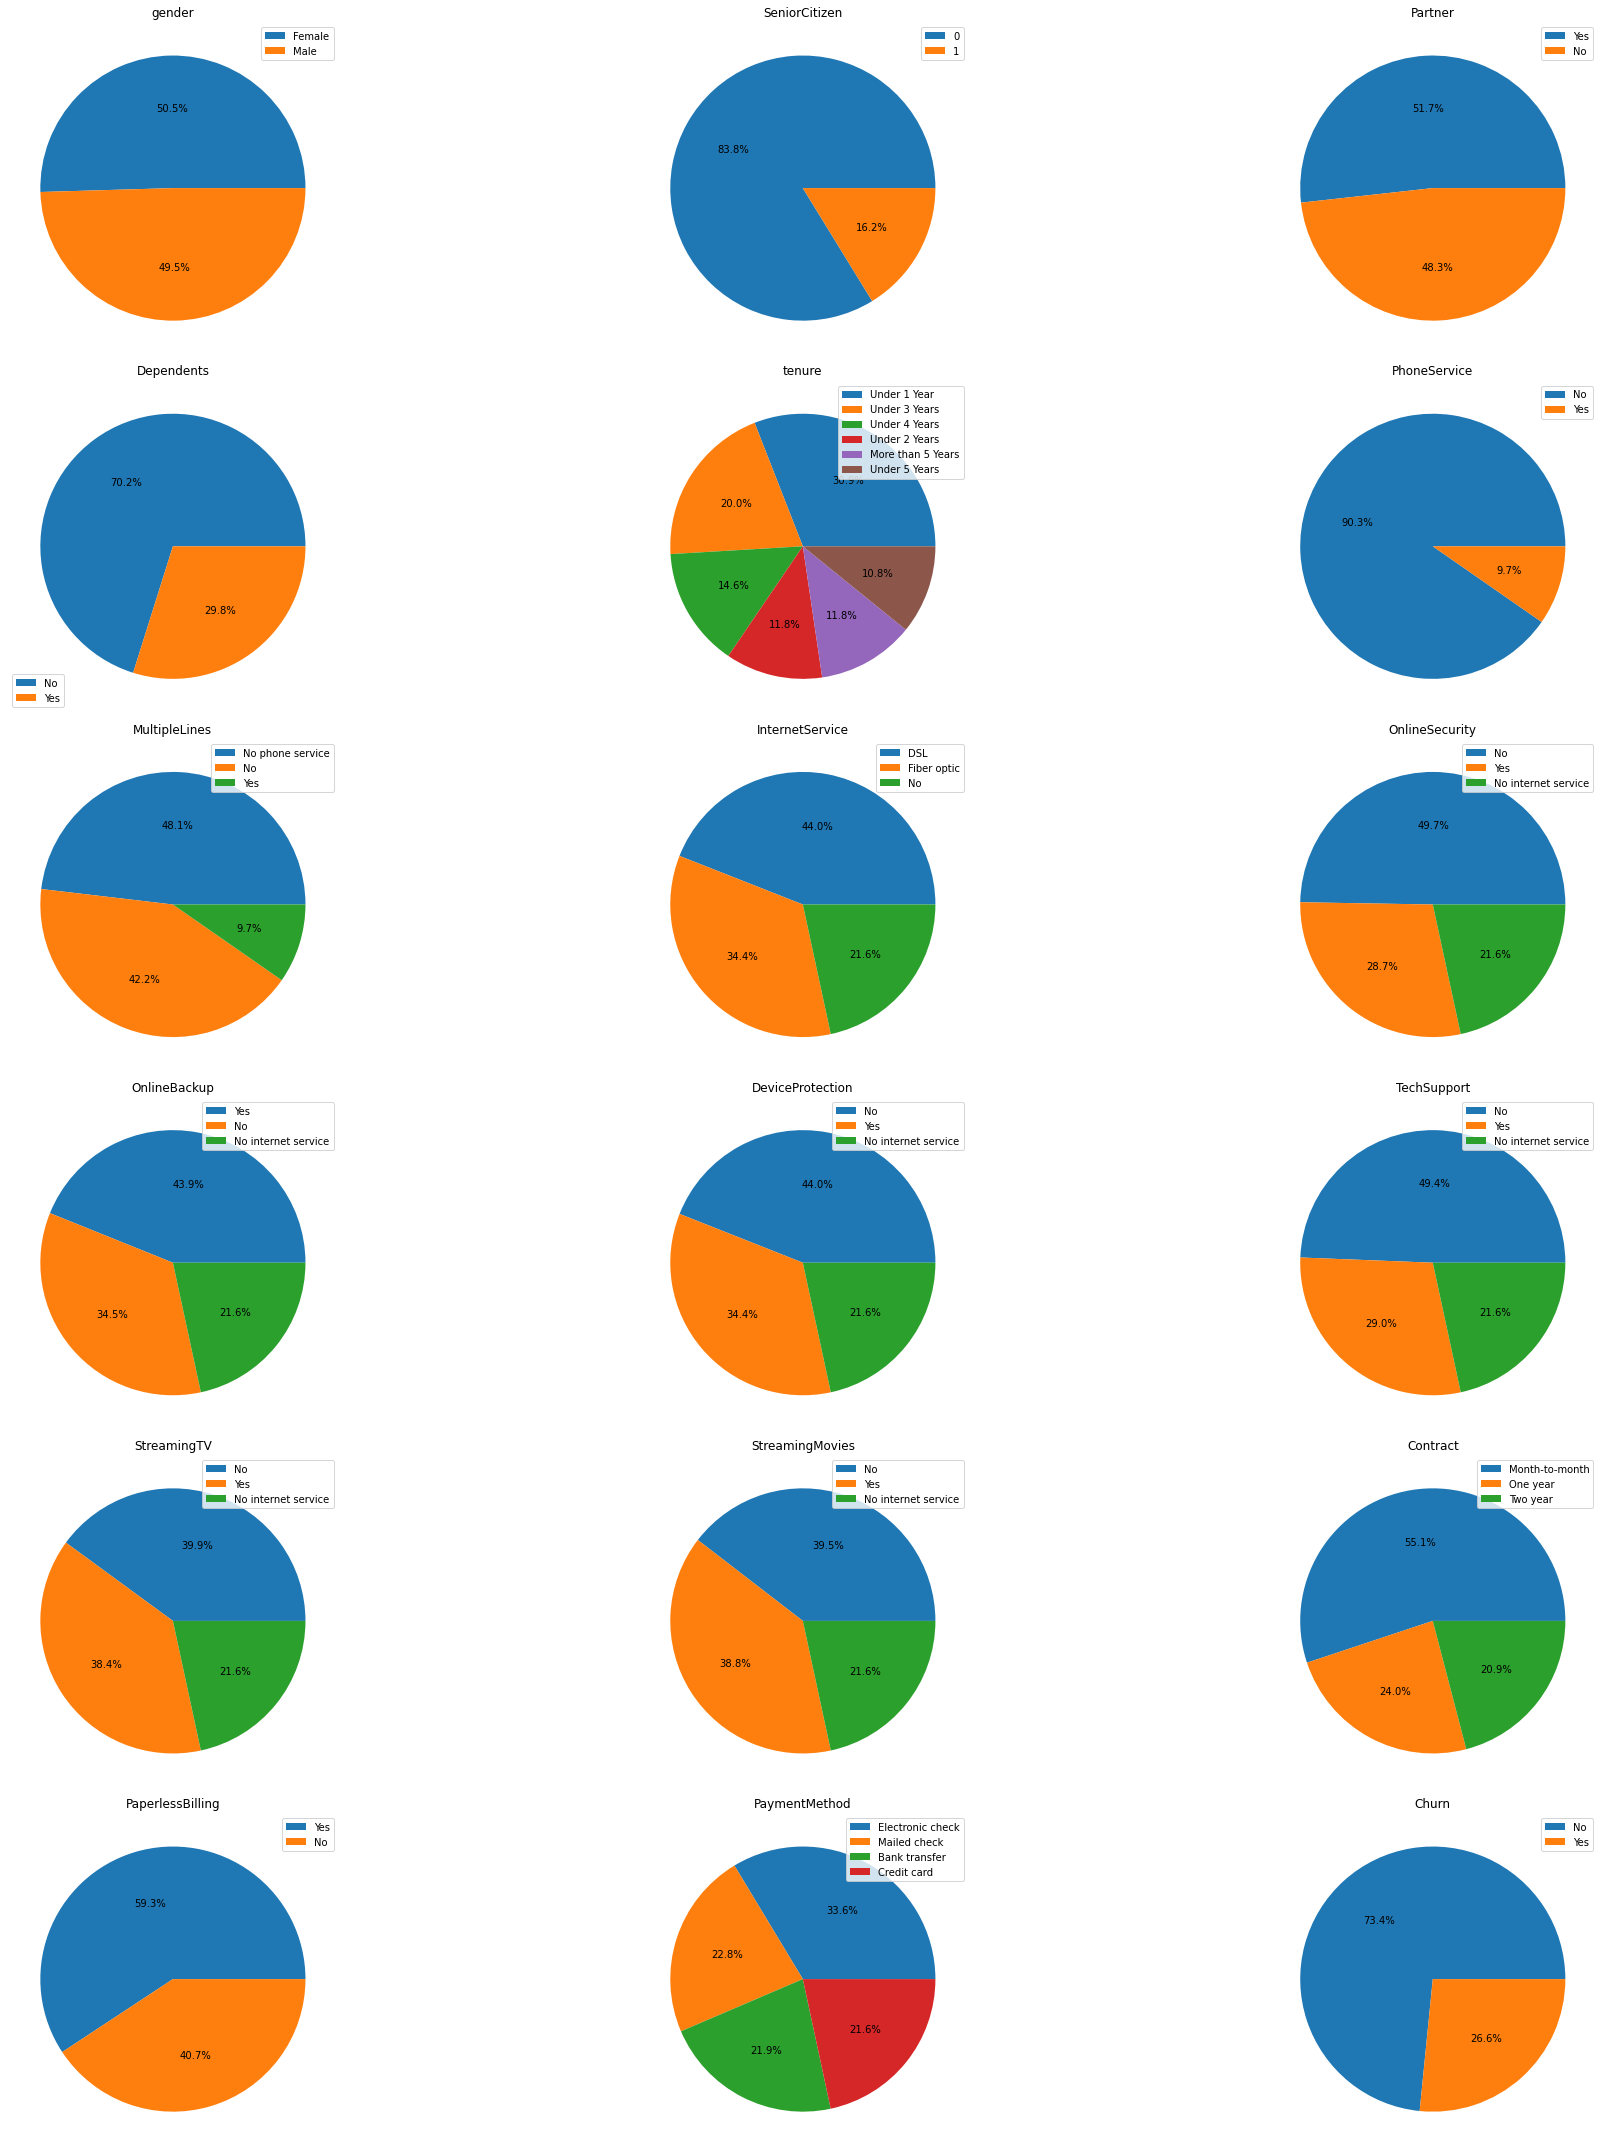

In [244]:
COLS = DF_FINAL.drop(['TotalCharges', 'MonthlyCharges'], axis = 1).columns
PIEPLOTS(DF_FINAL,COLS)

    * We have divided the Tenure column into three groups i.e. 1-24, 25-48, 49-72 to plot the tenure data easily
    * More than 40% of the users are under 1-12 and 13-24 tenure combined
    * There are more of the users where there is no churn.
    * Most of the customers have paid their bills through Electronic Check.
    * Male to Female customers are almost equal in usage.
    * More than 83% of the customers are not senior citizens.
    * More than 90% of the customers are not using phone service and same amount of customers are not having
    multiple lines
    * 21.6% of customers are not having internet service as well as online security.
    * Internet service, Online Security, Online Protection and Device protection are having same plots and can be
    seen as interconnected to each other.
    * 59.3% of the customers opted for paperless billing.
    * Streaming TV and Streaming movies are having similar plots.

* STEP 6.2:

    * We have to encode the appropriate categorical values using suitable methods.
    
    * We are going to use label encoder and onehot encoder methods to perform this action.
    
    * for columns with either yes or no or only two values we will use label encoder method
    
    * for columns with more than 2 unique values, we will use onehot encoder method.

In [245]:
def LABEL_ENCODER(DF_FINAL,LE_COLS):
    for COL in LE_COLS:
        DF_FINAL[COL] = DF_FINAL[COL].map({'Yes':1, 'No':0})
    return DF_FINAL

In [246]:
LE_COLS = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

DF_FINAL = LABEL_ENCODER(DF_FINAL,LE_COLS)

In [247]:
DF_FINAL['gender'] = DF_FINAL['gender'].map({'Female':1, 'Male':0})

In [248]:
def ONEHOT_ENCODER(DF_FINAL,OH_COLS):
    DF_FINAL = pd.get_dummies(DF_FINAL, columns = OH_COLS)
    return DF_FINAL

In [249]:
OH_COLS = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

DF_FINAL = ONEHOT_ENCODER(DF_FINAL, OH_COLS)

* STEP 7.1:

    * Define a function to plot the correlation between the target feature Churn and other columns.
    
    * Write a function CORR_PLOT to take the DF_FINAL as input and plot the correlation.

In [250]:
def CORR_PLOT(DF_FINAL):
    plt.figure(figsize = (16,10))
    DF_FINAL.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20,5))
    plt.show()

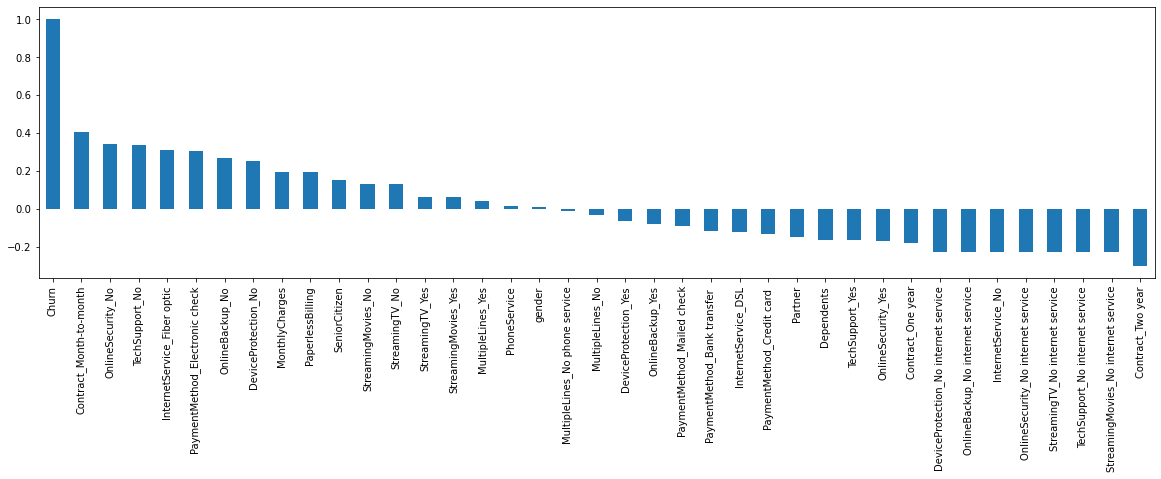

In [251]:
CORR_PLOT(DF_FINAL)

* STEP 7.2:

    * Split the data into 80% train and 20% test.
    
    * Create a function to split the data into test and train.
    
    * Choose 80% of the data as training data and 20% as testing data
    
    * Scale the data using minmaxscaler before proceeding to find the best performing model.
    
    * Normalize/Standardize the data with the best suitable approach.
    
    * We are going to use Normalize method scale the data
    
    * We use normalization only on the feature columns and not on target variable.

In [252]:
def TEST_TRAIN_SPLIT(DF_FINAL):
    X = DF_FINAL.drop('Churn', axis = 1)
    Y = DF_FINAL['Churn']
    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,test_size=0.20,random_state=24)
    return X_TRAIN, X_TEST, Y_TRAIN, Y_TEST

In [253]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = TEST_TRAIN_SPLIT(DF_FINAL)

In [254]:
def NORMALIZE(X_TRAIN, X_TEST):
    # fit scaler on training data
    normalize = MinMaxScaler().fit(X_TRAIN.drop(columns = 'tenure'))

    # transform training data
    X_TRAIN_N = normalize.transform(X_TRAIN.drop(columns = 'tenure'))

    # transform testing dataabs
    X_TEST_N = normalize.transform(X_TEST.drop(columns = 'tenure'))
    
    return X_TRAIN_N, X_TEST_N

In [255]:
X_TRAIN_N, X_TEST_N = NORMALIZE(X_TRAIN, X_TEST)

* STEP 8:

    * Define a function that takes the various classification and regression models as input
    
    * The function fits the training data according to the model initially.
    
    * Then it predicts the target value based on the testing features data.
    
    * Then we compare the actual target value with the predicted value and print the various metrics.
    
    * Models used to evaluate the train and test data are:
        * LOGISTIC REGRESSION
        * KNN CLASSIFIER
        * NAIVE BAYES
        * SVM LINEAR
        * SVM POLY
        * SVM RBF
        * RANDOM FOREST
        * DECISION TREE
        * XBF CLASSIFIER

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def MODEL(MODEL_TYPE,X_TRAIN_N, Y_TRAIN):
    RESULTS = pd.DataFrame()
    for name, model in MODEL_TYPE:
        MODEL_EVAL = model
        MODEL_EVAL.fit(X_TRAIN_N, Y_TRAIN)
        Y_PRED = MODEL_EVAL.predict(X_TEST_N)
        ACCURACY = accuracy_score(Y_TEST, Y_PRED)
        PRECISION = precision_score(Y_TEST, Y_PRED)
        RECALL = recall_score(Y_TEST, Y_PRED)
        F1_SCORE = f1_score(Y_TEST, Y_PRED)
        RESULTS = RESULTS.append(pd.Series([name,ACCURACY,PRECISION,RECALL,F1_SCORE]),ignore_index=True)
    RESULTS.columns = ['MODEL_NAME','ACCURACY','PRECISION','RECALL','F1-SCORE']
    return RESULTS

In [257]:
MODEL_TYPE = []
MODEL_TYPE.append(('LOGISTIC REGRESSION', LogisticRegression()))
MODEL_TYPE.append(('KNN CLASSIFIER', KNeighborsClassifier(n_neighbors=25)))
MODEL_TYPE.append(('NAIVE BAYES', GaussianNB()))
MODEL_TYPE.append(('SVM-LINEAR', SVC(kernel='linear',C=1,gamma=.6)))
MODEL_TYPE.append(('SVM-POLY', SVC(kernel='rbf',degree=2,C=.009)))
MODEL_TYPE.append(('SVM-RBF', SVC(kernel='poly',degree=2,gamma=0.1,C=.01)))
MODEL_TYPE.append(('RANDOM FOREST', RandomForestClassifier()))
MODEL_TYPE.append(('DECISION TREE', DecisionTreeClassifier()))
MODEL_TYPE.append(('XGB CLASSIFIER', XGBClassifier(eval_metric = ["auc","error"])))

In [258]:
RESULTS = MODEL(MODEL_TYPE,X_TRAIN_N, Y_TRAIN)
print('\nRESULTS USING VARIOUS BASE MODELS:\n')
print('*******************************************************************\n',RESULTS)


RESULTS USING VARIOUS BASE MODELS:

*******************************************************************
             MODEL_NAME  ACCURACY  PRECISION    RECALL  F1-SCORE
0  LOGISTIC REGRESSION  0.814499   0.690554  0.560847  0.618978
1       KNN CLASSIFIER  0.791045   0.609375  0.619048  0.614173
2          NAIVE BAYES  0.683014   0.452247  0.851852  0.590826
3           SVM-LINEAR  0.807392   0.675410  0.544974  0.603221
4             SVM-POLY  0.731343   0.000000  0.000000  0.000000
5              SVM-RBF  0.734186   0.833333  0.013228  0.026042
6        RANDOM FOREST  0.790334   0.632588  0.523810  0.573082
7        DECISION TREE  0.720682   0.479109  0.455026  0.466757
8       XGB CLASSIFIER  0.791045   0.634615  0.523810  0.573913


    * We have run the various models with out any tuning and results were published.
    
    * We can see LOGISTIC REGRESSION performed better on base model next to SVM-LINEAR and RANDOM FOREST
    
    * NAIVE BAYES model is having the least performing score out of all the base models.

* STEP 9:
    
    * Let us define a function to print the classification matrix for the various models used for evaluation.

In [259]:
def CLASSIFICATION_REPORT(MODEL_TYPE):
    RESULTS = pd.DataFrame()
    for name, model in MODEL_TYPE:
        MODEL_EVAL = model
        MODEL_EVAL.fit(X_TRAIN_N, Y_TRAIN)
        Y_PRED = MODEL_EVAL.predict(X_TEST_N)
        print('CLASSIFICATION REPORT FOR ',name)
        print('******************************************************************')
        print(classification_report(Y_TEST,Y_PRED),'\n')

In [260]:
CLASSIFICATION_REPORT(MODEL_TYPE)

CLASSIFICATION REPORT FOR  LOGISTIC REGRESSION
******************************************************************
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1029
           1       0.69      0.56      0.62       378

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.81      0.81      1407
 

CLASSIFICATION REPORT FOR  KNN CLASSIFIER
******************************************************************
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1029
           1       0.61      0.62      0.61       378

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407
 

CLASSIFICATION REPORT FOR  NAIVE BAYES
******************************************************************
             

* STEP 10:

    * Let us define the function that plots the confusion matrix for the various evaluation models used.

In [261]:
def CONFUSION_MATRIX(MODEL_TYPE):
    for name, model in MODEL_TYPE:
        MODEL_EVAL = model
        Y_PRED = MODEL_EVAL.predict(X_TEST_N)

        CM = metrics.confusion_matrix(Y_TEST, Y_PRED,labels=[0, 1])

        CM_DF = pd.DataFrame(CM, index = [i for i in ["NO","YES"]],
                  columns = [i for i in ["NO","YES"]])

        plt.figure(figsize = (7,5))
        
        plt.title(name)

        sns.heatmap(CM_DF, annot=True ,fmt='g')
    
        plt.show()

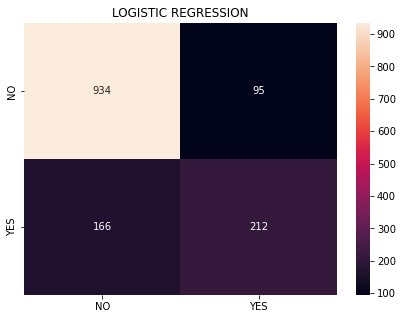

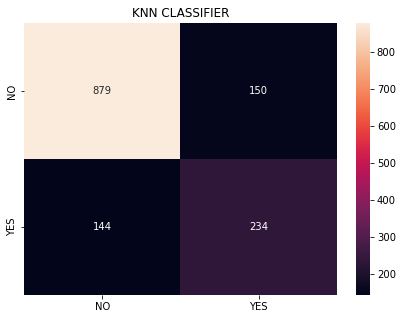

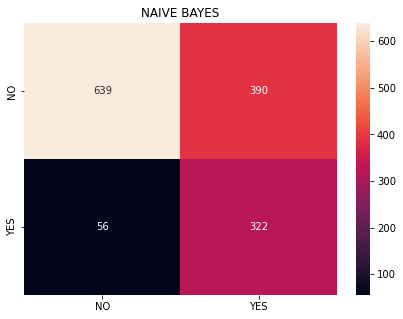

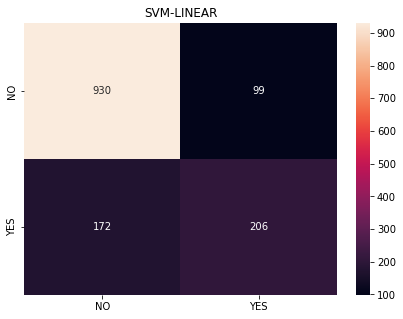

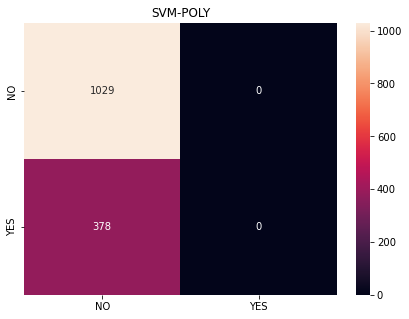

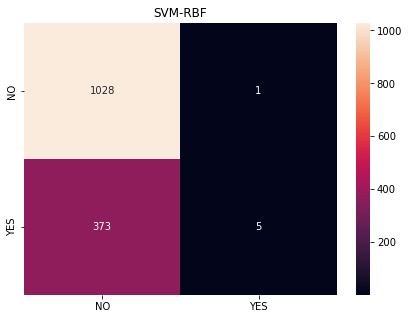

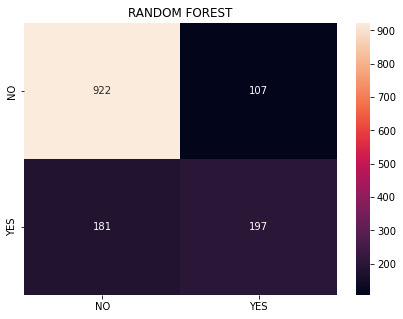

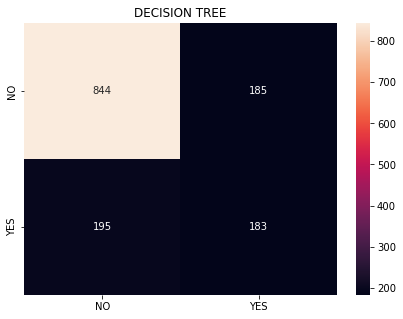

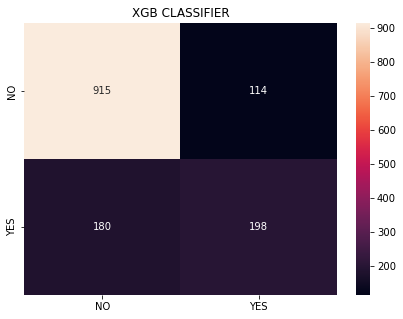

In [262]:
CONFUSION_MATRIX(MODEL_TYPE)

* STEP 11:

    * Print the best base model that fits the training and testing data using above analysis
    
    * Create a function that compares the accuracy score for the various base models and prints best performing model.

In [263]:
def BEST_MODEL(RESULTS):
    print('MODEL WITH BEST ACCURACY:\n')
    print(RESULTS[RESULTS['ACCURACY'] == max(RESULTS['ACCURACY'])])

In [264]:
BEST_MODEL(RESULTS)

MODEL WITH BEST ACCURACY:

            MODEL_NAME  ACCURACY  PRECISION    RECALL  F1-SCORE
0  LOGISTIC REGRESSION  0.814499   0.690554  0.560847  0.618978


In [265]:
def CV_BESTMODEL(MODEL_TYPES,X_TRAIN_N,Y_TRAIN):
    MODEL_RESULTS = []
    MODEL_NAME = []
    scoring = 'accuracy'
    for name, model in MODEL_TYPES:
        KFOLD = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
        CV_RESULTS = model_selection.cross_val_score(model,  X_TRAIN_N,Y_TRAIN, cv = KFOLD, scoring=scoring)
        MODEL_RESULTS.append(CV_RESULTS)
        MODEL_NAME.append(name)
        msg = "%s: %f (%f)" % (name, CV_RESULTS.mean(), CV_RESULTS.std())
        print(msg)
    
    fig = plt.figure(figsize = (20,10))
    fig.suptitle('ALGORITHM COMPARISON')
    ax = fig.add_subplot(111)
    plt.boxplot(MODEL_RESULTS)
    ax.set_xticklabels(MODEL_NAME)
    plt.show()

LOGISTIC REGRESSION: 0.797697 (0.020676)
KNN CLASSIFIER: 0.777962 (0.019861)
NAIVE BAYES: 0.679471 (0.008655)
SVM-LINEAR: 0.791654 (0.023802)
SVM-POLY: 0.734939 (0.013937)
SVM-RBF: 0.734939 (0.014005)
RANDOM FOREST: 0.781687 (0.011666)
DECISION TREE: 0.728535 (0.016895)
XGB CLASSIFIER: 0.783290 (0.022659)


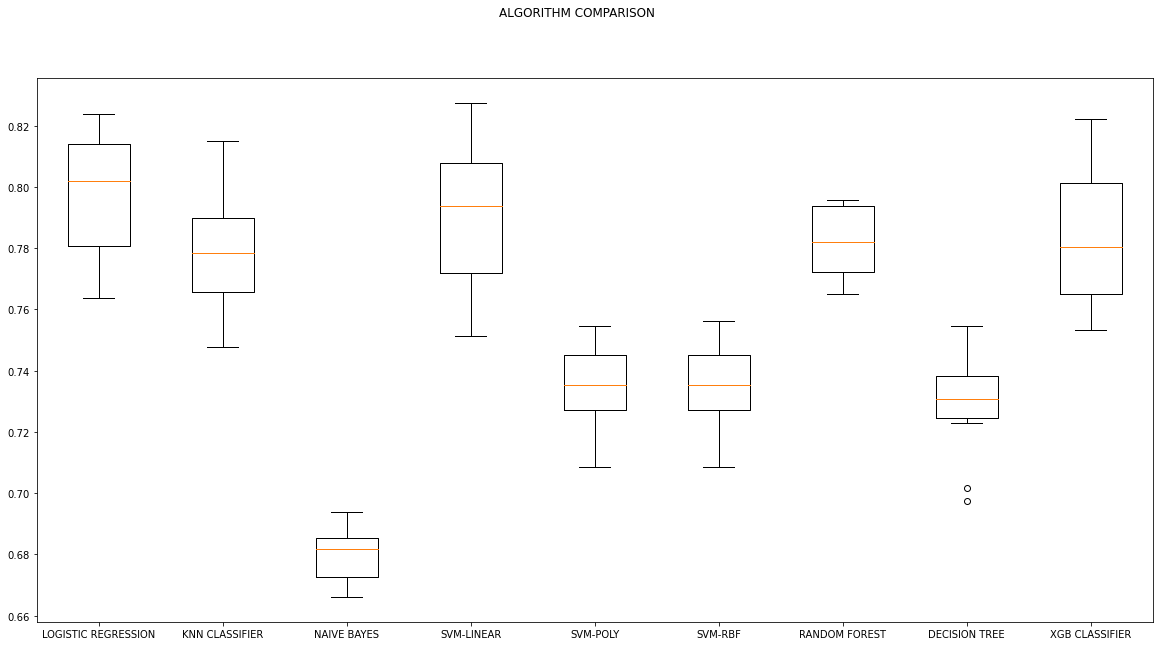

In [266]:
CV_BESTMODEL(MODEL_TYPE,X_TRAIN_N,Y_TRAIN)

LOGISTIC REGRESSION: 0.802356 (0.026058)
KNN CLASSIFIER: 0.787421 (0.026904)
NAIVE BAYES: 0.714240 (0.033215)
SVM-LINEAR: 0.800233 (0.021436)
SVM-POLY: 0.731353 (0.026395)
SVM-RBF: 0.731353 (0.026395)
RANDOM FOREST: 0.800917 (0.030206)
DECISION TREE: 0.741266 (0.031521)
XGB CLASSIFIER: 0.781763 (0.023540)


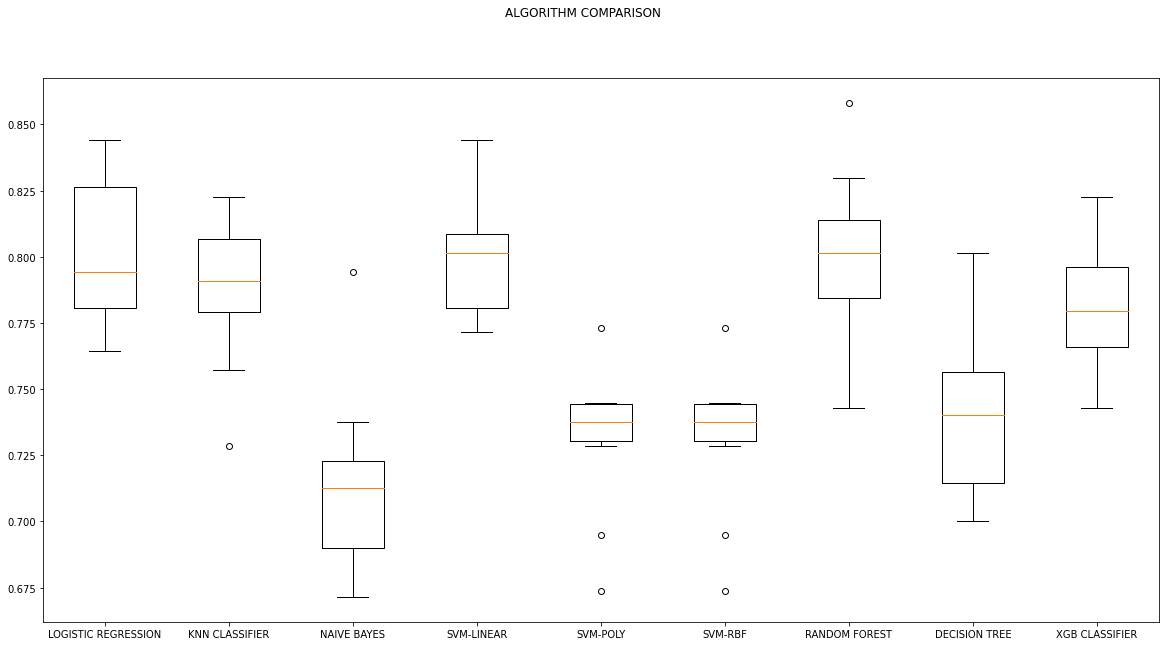

In [267]:
CV_BESTMODEL(MODEL_TYPE,X_TEST_N,Y_TEST)

    * WE HAVE USED KFOLD-CV TO FIND THE BEST PERFORMING MODEL ON THE TRAINING AND TESTING DATA SET.
    
    * LOGISTIC REGRESSION, SVM LINEAR AND RANDOM FOREST HAS THE BEST PERFORMANCE.
    
    * NAIVE BAYES HAS THE POOR PERFORMANCE IN FITTING THE DATA.

In [268]:
def BEST_MODEL_PARAMS(MODELS,X_TRAIN_N,Y_TRAIN):
    BEST_SCORE = []
    MODEL_NAME = []
    for name, model, params in MODELS:
        #CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        SEARCH_BEST = RandomizedSearchCV(model, n_iter=50, scoring='accuracy',
                                         param_distributions = params, n_jobs=10, cv=3, random_state=1)
        TUNE_RESULTS = SEARCH_BEST.fit(X_TRAIN_N, Y_TRAIN)
        print(name)
        print('*******************************************************************************************')
        print('BEST SCORE: %s' % TUNE_RESULTS.best_score_)
        print('BEST PARAMETERS: %s' % TUNE_RESULTS.best_params_)
        print('\n\n')
        MODEL_NAME.append(name)
        BEST_SCORE.append(TUNE_RESULTS.best_score_)
    return MODEL_NAME, BEST_SCORE

In [269]:
MODEL_BEST = []

MODEL_BEST.append(('LOGISTIC REGRESSION', LogisticRegression(),{'solver' : ['newton-cg', 'lbfgs', 'liblinear'], 
                                                                'penalty' : ['none', 'l1', 'l2', 'elasticnet'], 
                                                                'C' : np.arange(0.1,1.1,.1)}))

MODEL_BEST.append(('KNN CLASSIFIER', KNeighborsClassifier(),{'n_neighbors' : np.arange(5,51,2), 
                                                             'weights' : ['uniform','distance'], 
                                                             'metric' : ['minkowski','euclidean',
                                                                         'manhattan','chebyshev']}))

MODEL_BEST.append(('NAIVE BAYES', GaussianNB(),{'var_smoothing': np.logspace(0,-9, num=100)}))

In [270]:
BEST_MODEL_PARAMS(MODEL_BEST,X_TRAIN_N,Y_TRAIN)

LOGISTIC REGRESSION
*******************************************************************************************
BEST SCORE: 0.7944888888888889
BEST PARAMETERS: {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.5}



KNN CLASSIFIER
*******************************************************************************************
BEST SCORE: 0.7808
BEST PARAMETERS: {'weights': 'uniform', 'n_neighbors': 49, 'metric': 'manhattan'}



NAIVE BAYES
*******************************************************************************************
BEST SCORE: 0.6776888888888889
BEST PARAMETERS: {'var_smoothing': 0.02848035868435802}





(['LOGISTIC REGRESSION', 'KNN CLASSIFIER', 'NAIVE BAYES'],
 [0.7944888888888889, 0.7808, 0.6776888888888889])

In [271]:
BEST_MODEL_PARAMS(MODEL_BEST,X_TEST_N,Y_TEST)

LOGISTIC REGRESSION
*******************************************************************************************
BEST SCORE: 0.8073916133617626
BEST PARAMETERS: {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.5}



KNN CLASSIFIER
*******************************************************************************************
BEST SCORE: 0.7917555081734187
BEST PARAMETERS: {'weights': 'uniform', 'n_neighbors': 31, 'metric': 'manhattan'}



NAIVE BAYES
*******************************************************************************************
BEST SCORE: 0.7199715707178393
BEST PARAMETERS: {'var_smoothing': 5.336699231206302e-08}





(['LOGISTIC REGRESSION', 'KNN CLASSIFIER', 'NAIVE BAYES'],
 [0.8073916133617626, 0.7917555081734187, 0.7199715707178393])

In [272]:
SVM_LINEAR = []

SVM_LINEAR.append(('SVM-LINEAR', SVC(),{'kernel' : ['linear'], 'C': [0.1,1, 10, 100], 
                                 'gamma': [1,0.1,0.01,0.001]}))

In [273]:
BEST_MODEL_PARAMS(SVM_LINEAR,X_TRAIN_N,Y_TRAIN)

SVM-LINEAR
*******************************************************************************************
BEST SCORE: 0.7937777777777777
BEST PARAMETERS: {'kernel': 'linear', 'gamma': 1, 'C': 0.1}





(['SVM-LINEAR'], [0.7937777777777777])

In [274]:
BEST_MODEL_PARAMS(SVM_LINEAR,X_TEST_N,Y_TEST)

SVM-LINEAR
*******************************************************************************************
BEST SCORE: 0.8059701492537313
BEST PARAMETERS: {'kernel': 'linear', 'gamma': 1, 'C': 10}





(['SVM-LINEAR'], [0.8059701492537313])

In [275]:
XGB_BEST = []

XGB_BEST.append(('XGB CLASSIFIER', XGBClassifier(eval_metric = ["auc","error"]),{'learning_rate': np.arange(0.1, 0.4, 0.2), 
                                                                                   'n_estimators': np.arange(300, 501, 100), 
                                                                                   'max_depth': np.arange(4, 6, 1), 
                                                                                   'gamma': np.arange(0.8, 1.0, 0.1), 
                                                                                   'min_child_weight': np.arange(4, 7, 2), 
                                                                                   'reg_alpha': np.arange(0.5, 0.7, 0.1), 
                                                                                   'reg_lambda': np.arange(0.3, 0.5, 0.1), 
                                                                                   'subsample': np.arange(0.9, 1.1, 0.1), 
                                                                                   'colsample_bytree': np.arange(0.7, 1.0, 0.2)}))

In [276]:
BEST_MODEL_PARAMS(XGB_BEST,X_TRAIN_N,Y_TRAIN)

XGB CLASSIFIER
*******************************************************************************************
BEST SCORE: 0.7984
BEST PARAMETERS: {'subsample': 1.0, 'reg_lambda': 0.3, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.9, 'colsample_bytree': 0.8999999999999999}





(['XGB CLASSIFIER'], [0.7984])

In [277]:
BEST_MODEL_PARAMS(XGB_BEST,X_TEST_N,Y_TEST)

XGB CLASSIFIER
*******************************************************************************************
BEST SCORE: 0.8102345415778252
BEST PARAMETERS: {'subsample': 1.0, 'reg_lambda': 0.4, 'reg_alpha': 0.5, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.9, 'colsample_bytree': 0.8999999999999999}





(['XGB CLASSIFIER'], [0.8102345415778252])

In [278]:
RF_BEST = []

RF_BEST.append(('RANDOM FOREST', RandomForestClassifier(),{'n_estimators': np.arange(300,501,50), 
                                                              'max_features': ['auto','sqrt'], 
                                                              'max_depth': np.arange(4, 7, 1), 
                                                              'criterion': ['gini','entropy'], 
                                                              'bootstrap': [True, False]}))

In [279]:
BEST_MODEL_PARAMS(RF_BEST,X_TRAIN_N,Y_TRAIN)

RANDOM FOREST
*******************************************************************************************
BEST SCORE: 0.7962666666666666
BEST PARAMETERS: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}





(['RANDOM FOREST'], [0.7962666666666666])

In [280]:
BEST_MODEL_PARAMS(RF_BEST,X_TEST_N,Y_TEST)

RANDOM FOREST
*******************************************************************************************
BEST SCORE: 0.8102345415778252
BEST PARAMETERS: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}





(['RANDOM FOREST'], [0.8102345415778252])

In [281]:
DT_BEST = []

DT_BEST.append(('DECISION TREE', DecisionTreeClassifier(),{'max_depth': [2, 3, 5, 10, 20], 
                                                              'min_samples_leaf': [5, 10, 20, 50, 100], 
                                                              'criterion': ["gini", "entropy"]}))

In [282]:
BEST_MODEL_PARAMS(DT_BEST,X_TRAIN_N,Y_TRAIN)

DECISION TREE
*******************************************************************************************
BEST SCORE: 0.7879111111111111
BEST PARAMETERS: {'min_samples_leaf': 100, 'max_depth': 5, 'criterion': 'gini'}





(['DECISION TREE'], [0.7879111111111111])

In [283]:
BEST_MODEL_PARAMS(DT_BEST,X_TEST_N,Y_TEST)

DECISION TREE
*******************************************************************************************
BEST SCORE: 0.806680881307747
BEST PARAMETERS: {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}





(['DECISION TREE'], [0.806680881307747])

    * We have used randomized method to tune the parameters and check the performance of the models.
    
    * Logistic Regression maintains the performance without any much improvements.
    
    * KNN, RANDOM FOREST and XGB had improved their performance.
    
    * DECISION TREE classifier has shown the significant improvement in predicting the data.
    
    * XGB and RANDOM FOREST models after hypertuning the parameters are pretty close to each other.
    
    * DECISION TREE MODEL has improved very much after the hyper parameters tuning.
    
    * SVM model using linear kernel shown slight improvement ater tuning.
    
    CONCLUSION:
    
    * FROM THE ABOVE ANALYSIS, WE CAN SEE THAT XGB HAS BEST SCORE AFTER TUNING HYPER PARAMETERS.
    
        WE CAN CONSIDER THE XGB MODEL AS THE FINAL MODEL FOR TRAINING OUR DATA SET.
        
    * LET US PRINT THE CONFUSION MATRIX AND CLASSIFICATION REPORT FOR THE FINAL XGB MODEL WITH BEST PARAMETERS.

In [285]:
XGB_FINAL = []

XGB_FINAL.append(("XGB CLASSIFIER", XGBClassifier(eval_metric = ["auc","error"],
                                                subsample= 1.0, reg_lambda= 0.3, reg_alpha= 0.5, 
                                                n_estimators= 500, min_child_weight= 6, max_depth= 4, 
                                                learning_rate= 0.1, gamma= 0.9, 
                                                colsample_bytree= 0.8999999999999999)))
CLASSIFICATION_REPORT(XGB_FINAL)

CLASSIFICATION REPORT FOR  XGB CLASSIFIER
******************************************************************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1029
           1       0.66      0.55      0.60       378

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407
 



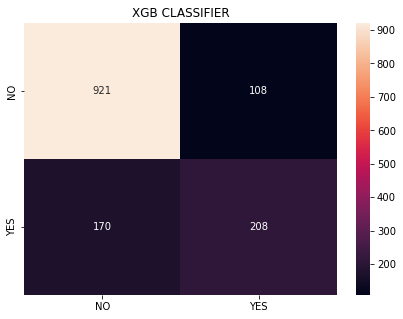

In [286]:
CONFUSION_MATRIX(XGB_FINAL)

# END OF THE ENSEMBLED LEARNING PROBLEM STATEMENT SOLUTION